# Análise exploratória e preparação das bases - BR Bank


In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
!/usr/share/locales/install-language-pack pt_BR.utf8
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)

Generating locales (this might take a while)...
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.UTF-8... done
Generation complete.


In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from matplotlib.ticker import PercentFormatter
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

## Cadastro Conta corrente


In [3]:
#importando a base de cadastro
cadastro = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Cadastro_Conta_Digital.xlsx', sheet_name='Base_Cadastro_CC Digital')


In [4]:
#importando base com DDD
ddd = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/DDD.xlsx')


In [5]:
#cores para os gráficos
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#FFA500", "#F2E205"]

In [6]:
cadastro.dropna(how='all', inplace=True)

In [7]:
# Há 512 registros e 7 colunas
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Data do Cadastro na Conta Digital                     512 non-null    datetime64[ns]
 1   ID_Lead                                               512 non-null    int64         
 2   DDD do Celular                                        512 non-null    int64         
 3   Qual a sua área de atuação?                           512 non-null    object        
 4   Qual o seu cargo atual?                               512 non-null    object        
 5   Quais seus objetivos com a conta digital da BR Bank?  512 non-null    object        
 6   Como você conheceu o BR Bank?                         512 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


In [8]:
# selecionando as variáveis de interesse na base de DDD
ddd = ddd[['Prefixo', 'Estado']]

In [9]:
#unindo as duas bases
cadastro = cadastro.merge(ddd, how='left', left_on='DDD do Celular', right_on='Prefixo')

In [10]:
cadastro.head()

,Data do Cadastro na Conta Digital,ID_Lead,DDD do Celular,Qual a sua área de atuação?,Qual o seu cargo atual?,Quais seus objetivos com a conta digital da BR Bank?,Como você conheceu o BR Bank?,Prefixo,Estado
0,2022-09-01,1511,11,Economia/Administração ou Mercado Financeiro,Analista,Busco um banco em que possa confiar,Indicação,11,São Paulo
1,2022-09-02,5276,51,Tecnologia,Estou desempregado(a) no momento,Busco um banco em que possa confiar,Indicação,51,Rio Grande do Sul
2,2022-09-03,1504,31,Tecnologia,Estou desempregado(a) no momento,Busco um banco em que possa confiar,Indicação,31,Minas Gerais
3,2022-09-04,4998,61,Engenharia/Matemática/Estatística/Física,Analista,Busco um banco em que possa confiar,Indicação,61,Distrito Federal/Goiás
4,2022-09-04,5090,84,Tecnologia,Estudante ou Assistente,Busco um banco em que possa confiar,Indicação,84,Rio Grande do Norte


In [11]:
# excluindo colunas do DDD
cadastro.drop(columns=['Prefixo', 'DDD do Celular'], inplace=True)

In [12]:
#renomeando colunas
cadastro.columns = ['data do cadastro da conta digital', 'ID_Lead', 'área de atuação', 'cargo atual', 'objetivo da conta digital', 'como conheceu o BR Bank', 'Estado']

In [13]:
#inclusão de colunas - mês de abertura
cadastro['mês da abertura'] = cadastro['data do cadastro da conta digital'].dt.to_period("M")

In [14]:
#inclusão de coluna - dia da semana
cadastro['dia da semana'] = cadastro['data do cadastro da conta digital'].dt.day_name(locale="pt_BR.utf8")

In [15]:
#quantidade de contas abertas por mês
freq_abs = pd.DataFrame(cadastro['mês da abertura'].value_counts(sort=False))
freq_rel = pd.DataFrame(cadastro['mês da abertura'].value_counts(1, sort=False)*100)
freq_conta_digital = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conta_digital.columns = ['mês da abertura', 'Qtde', '%']
freq_conta_digital = freq_conta_digital.round({'%': 2})
freq_conta_digital

,mês da abertura,Qtde,%
0,2022-09,35,6.84
1,2022-10,60,11.72
2,2022-11,71,13.87
3,2022-12,98,19.14
4,2023-01,129,25.20
5,2023-02,119,23.24


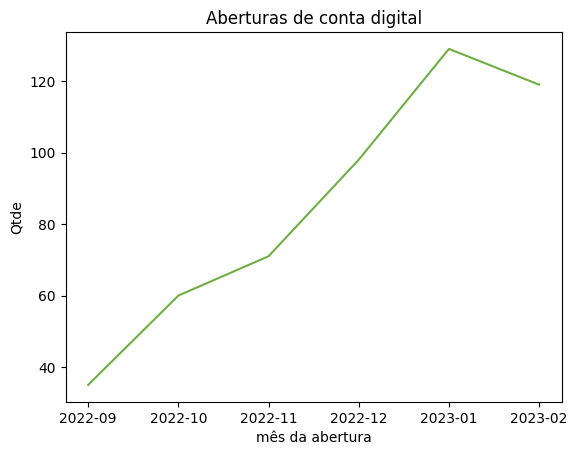

In [16]:
sns.lineplot(data=freq_conta_digital, x=freq_conta_digital["mês da abertura"].astype(str), y="Qtde", color='#70AD46', sort=False);
plt.title("Aberturas de conta digital");
plt.show();

A quantidade de contas abertas aumenta no decorrer dos meses, havendo leve queda no mês de fevereiro.

In [17]:
#abertura de acordo com dias da semana
freq_abs = cadastro['dia da semana'].value_counts().reset_index()
freq_abs.columns = ['dia da semana', 'Qtde']
freq_rel = pd.DataFrame(cadastro['dia da semana'].value_counts(1, sort=False)*100).reset_index()
freq_rel.columns = ['dia da semana', '%']
abertura_semana = freq_abs.merge(freq_rel, how='left')
abertura_semana = abertura_semana.round({'%': 2})
abertura_semana

,dia da semana,Qtde,%
0,Terça,86,16.80
1,Sexta,81,15.82
2,Quarta,78,15.23
3,Domingo,75,14.65
4,Quinta,68,13.28
5,Sábado,63,12.30
6,Segunda,61,11.91


As aberturas estão distribuídas pelos dias da semana.

In [18]:
#padronização de dados
cadastro.loc[cadastro['área de atuação']=='Pessoas / Recursos Humanos', 'área de atuação']='Recursos Humanos'
cadastro.loc[cadastro['área de atuação']=='Marketing / Publicidade', 'área de atuação']='Marketing/Publicidade'
cadastro.loc[cadastro['área de atuação']=='Atendimento ao cliente / Customer Experience', 'área de atuação']='Atendimento ao cliente / CX'
cadastro.loc[cadastro['área de atuação']=='Administração de Empresas', 'área de atuação']='Economia/Administração ou Mercado Financeiro'
cadastro.loc[cadastro['área de atuação']=='Economia', 'área de atuação']='Economia/Administração ou Mercado Financeiro'
cadastro.loc[cadastro['área de atuação']=='Mercado Financeiro', 'área de atuação']='Economia/Administração ou Mercado Financeiro'

In [19]:
# tabela de frequência da área de atuação
freq_abs = pd.DataFrame(cadastro['área de atuação'].value_counts())
freq_rel = pd.DataFrame(cadastro['área de atuação'].value_counts(1)*100).round(2)
freq_area_atuacao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_area_atuacao.columns = ['área de atuação', 'Qtde', '%']
freq_area_atuacao


,área de atuação,Qtde,%
0,Economia/Administração ou Mercado Financeiro,123,24.02
1,Análise Dados / Ciência Dados / Estatística,85,16.60
2,Tecnologia,51,9.96
3,Logística,42,8.20
4,Engenharia,33,6.45
5,Comercial / Vendas,20,3.91
6,Atendimento ao cliente / CX,20,3.91
7,Marketing/Publicidade,19,3.71
8,Outros,18,3.52
9,Educação,16,3.12


A área de atuação mais frequente é **Economia/Administração ou Mercado Financeiro** com 24,02%.

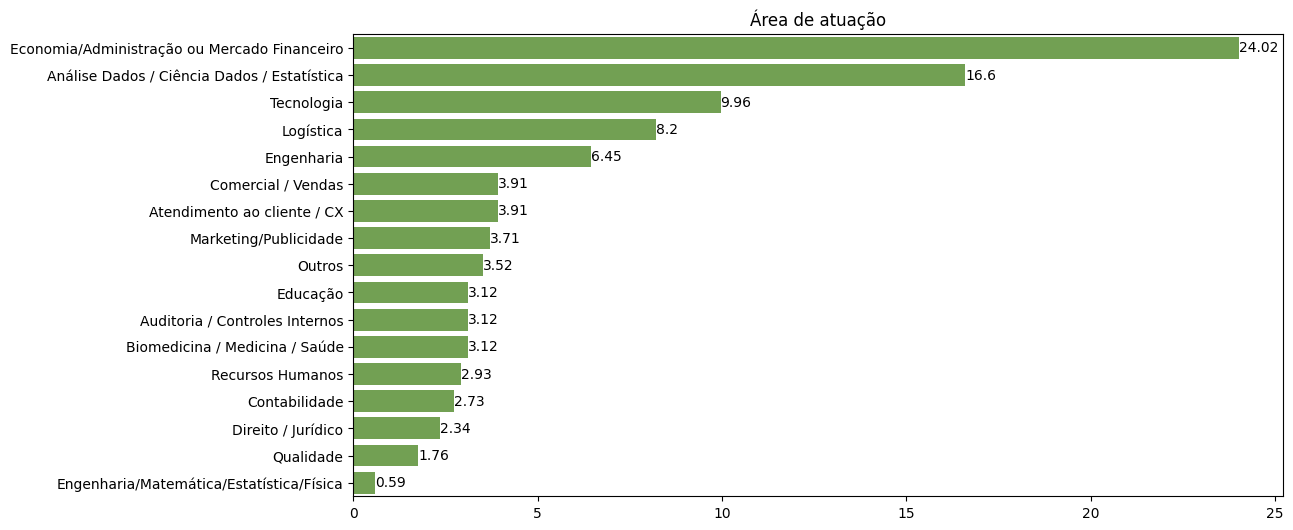

In [20]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_area_atuacao, x= "%", y= 'área de atuação', palette= ['#70AD46'])
ax.bar_label(ax.containers[0])
plt.title("Área de atuação")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [21]:
#tabela de frequência - cargo atual
freq_abs = pd.DataFrame(cadastro['cargo atual'].value_counts(dropna="False"))
freq_rel = pd.DataFrame(cadastro['cargo atual'].value_counts(1)*100).round(2)
freq_cargo_atual = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo_atual.columns = ['cargo atual', 'Qtde', '%']
freq_cargo_atual

,cargo atual,Qtde,%
0,Analista,177,34.57
1,Estou desempregado(a) no momento,78,15.23
2,Assistente,61,11.91
3,Coordenador(a) / Gerente,55,10.74
4,Estudante,48,9.38
5,Especialista,30,5.86
6,Outros,29,5.66
7,Estudante ou Assistente,11,2.15
8,Diretor(a) / C-Level,10,1.95
9,Consultor,4,0.78


34,57% dos clientes são analistas. Desempregado conta com 15,23% das observações.

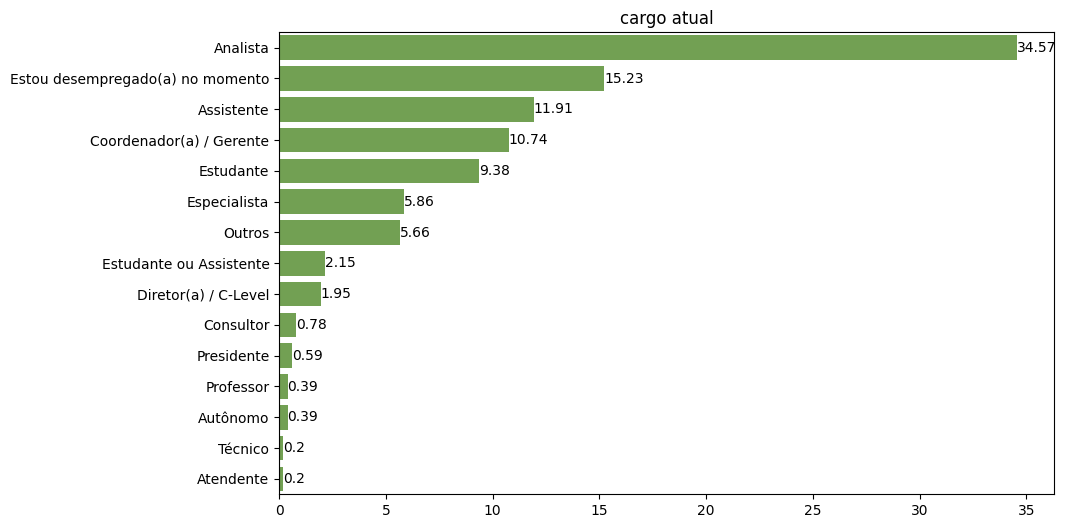

In [22]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=freq_cargo_atual, x= "%", y= 'cargo atual', palette= ['#70AD46'])
ax.bar_label(ax.containers[0])
plt.title('cargo atual')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [23]:
# tabela de frequência - objetivo da conta digital
freq_abs = pd.DataFrame(cadastro['objetivo da conta digital'].value_counts())
freq_rel = pd.DataFrame(cadastro['objetivo da conta digital'].value_counts(1)*100).round(2)
freq_objetivo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_objetivo.columns = ['objetivo da conta digital', 'Qtde', '%']
freq_objetivo


,objetivo da conta digital,Qtde,%
0,Busco um banco em que possa confiar,352,68.75
1,Apenas para testar a conta,160,31.25


A maior parte dos clientes (68,75%) busca um banco em que possa confiar.

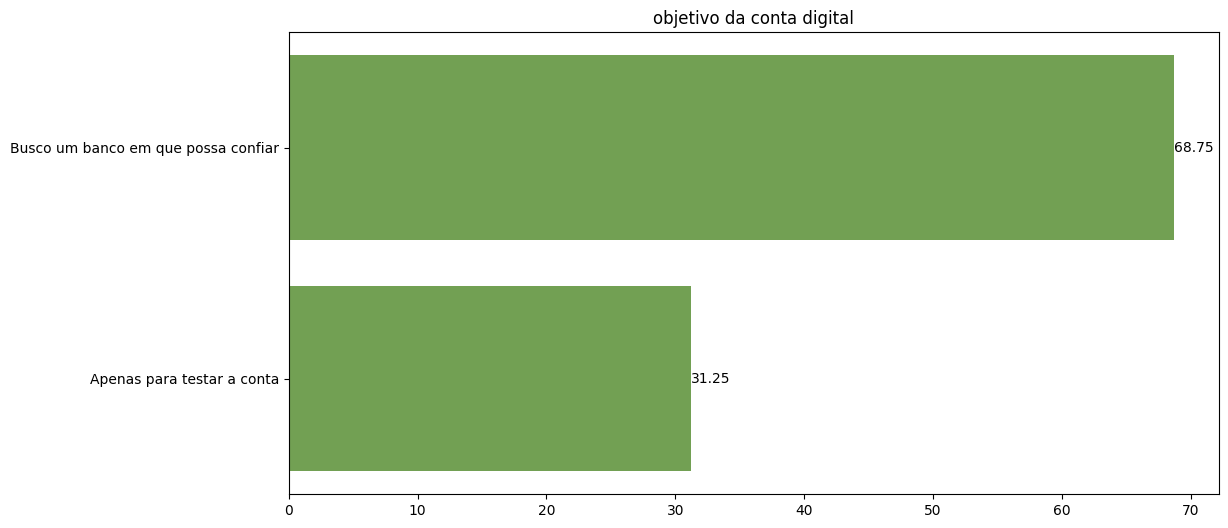

In [24]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_objetivo, x= "%", y= 'objetivo da conta digital', palette= ['#70AD46'])
ax.bar_label(ax.containers[0])
plt.title('objetivo da conta digital')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [25]:
freq_abs = pd.DataFrame(cadastro['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(cadastro['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['como conheceu o BR Bank', 'Qtde', '%']
freq_conheceu


,como conheceu o BR Bank,Qtde,%
0,Instagram,335,65.43
1,Indicação,98,19.14
2,Facebook,50,9.77
3,Google,13,2.54
4,Conta Salário,11,2.15
5,Youtube,5,0.98


65,43% dos clientes conheceram o BR Bank pelo Instagram.

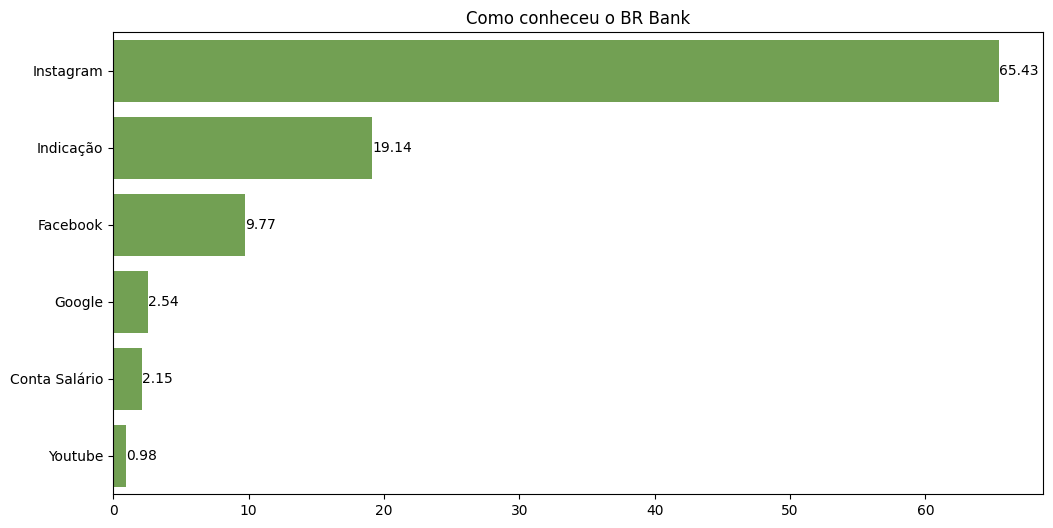

In [26]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_conheceu, x= "%", y= 'como conheceu o BR Bank', palette= ['#70AD46'])
ax.bar_label(ax.containers[0])
plt.title('Como conheceu o BR Bank')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [27]:
cadastro['Estado'].fillna("Estado não reconhecido", inplace=True)

In [28]:
cadastro['Estado'].value_counts(sort=False, dropna=False).reset_index()
freq_abs = pd.DataFrame(cadastro['Estado'].value_counts())
freq_rel = pd.DataFrame(cadastro['Estado'].value_counts(1)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['Estado', 'Qtde', '%']
freq_estado


,Estado,Qtde,%
0,São Paulo,183,35.74
1,Rio de Janeiro,62,12.11
2,Minas Gerais,49,9.57
3,Distrito Federal/Goiás,25,4.88
4,Ceará,23,4.49
5,Rio Grande do Sul,22,4.30
6,Bahia,22,4.30
7,Paraná,20,3.91
8,Pernambuco,13,2.54
9,Piauí,11,2.15


Mais de 50% dos clientes estão na região sudeste

In [29]:
infos_ufs = gpd.read_file("/content/drive/MyDrive/Acelera/bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

In [30]:
infos_ufs.rename({'nome': 'Estado'}, axis=1, inplace=True)

In [31]:
brasil = infos_ufs.merge(freq_estado, on= "Estado", how="left")

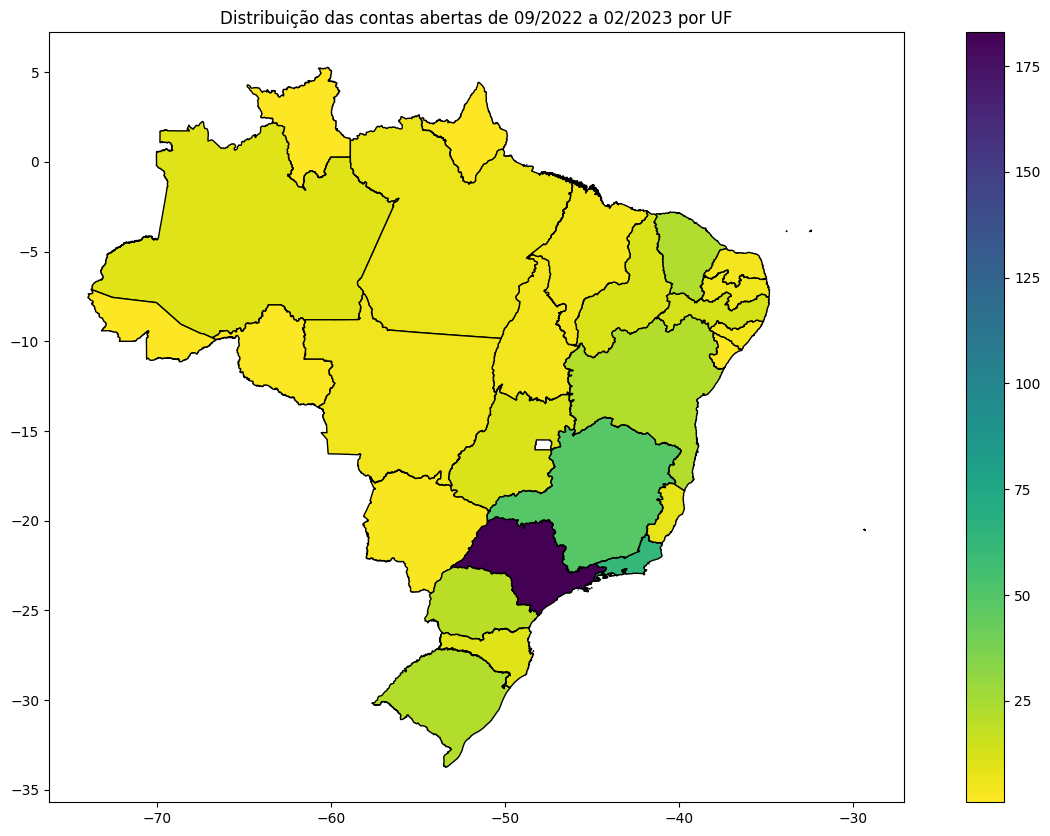

In [32]:
mapa_brasil = brasil.plot(column="Qtde", cmap="viridis_r", figsize=(16,10), legend=True, edgecolor='black')
plt.title("Distribuição das contas abertas de 09/2022 a 02/2023 por UF")
ax = mapa_brasil.plot()


In [33]:
#agrupando estados com poucas observações
cadastro.loc[cadastro["Estado"].isin(['Espírito Santo','Pará', 'Paraíba', 'Mato Grosso', 'Rio Grande do Norte', 'Tocantins', 'Alagoas'	'Maranhão', 'Mato Grosso do Sul', 'Rondônia', 'Estado não reconhecido',
                                  'Acre', 'Amapá', 'Roraima', 'Sergipe']), "Estado"] = "Outros estados"

In [34]:
cadastro.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_cadastro_conta_digital_tratada.xlsx", index=False)

### Análise Bivariada

In [35]:
cadastro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   data do cadastro da conta digital  512 non-null    datetime64[ns]
 1   ID_Lead                            512 non-null    int64         
 2   área de atuação                    512 non-null    object        
 3   cargo atual                        512 non-null    object        
 4   objetivo da conta digital          512 non-null    object        
 5   como conheceu o BR Bank            512 non-null    object        
 6   Estado                             512 non-null    object        
 7   mês da abertura                    512 non-null    period[M]     
 8   dia da semana                      512 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6), period[M](1)
memory usage: 40.0+ KB


In [36]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['área de atuação'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['área de atuação'].value_counts(1)*100).round(2)
freq_objetivo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_objetivo.columns = ['objetivo da conta digital', 'área de atuação','Qtde', '%']
freq_objetivo


,objetivo da conta digital,área de atuação,Qtde,%
0,Apenas para testar a conta,Economia/Administração ou Mercado Financeiro,34,21.25
1,Apenas para testar a conta,Análise Dados / Ciência Dados / Estatística,33,20.62
2,Apenas para testar a conta,Logística,16,10.00
3,Apenas para testar a conta,Engenharia,13,8.12
4,Apenas para testar a conta,Tecnologia,12,7.50
5,Apenas para testar a conta,Comercial / Vendas,8,5.00
6,Apenas para testar a conta,Atendimento ao cliente / CX,6,3.75
7,Apenas para testar a conta,Auditoria / Controles Internos,6,3.75
8,Apenas para testar a conta,Biomedicina / Medicina / Saúde,6,3.75
9,Apenas para testar a conta,Educação,5,3.12


In [37]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['cargo atual'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['cargo atual'].value_counts(1)*100).round(2)
freq_cargo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo.columns = ['objetivo da conta digital', 'cargo atual','Qtde', '%']
freq_cargo

,objetivo da conta digital,cargo atual,Qtde,%
0,Apenas para testar a conta,Analista,51,31.87
1,Apenas para testar a conta,Assistente,21,13.12
2,Apenas para testar a conta,Estou desempregado(a) no momento,21,13.12
3,Apenas para testar a conta,Coordenador(a) / Gerente,18,11.25
4,Apenas para testar a conta,Estudante,18,11.25
5,Apenas para testar a conta,Especialista,15,9.38
6,Apenas para testar a conta,Outros,11,6.88
7,Apenas para testar a conta,Diretor(a) / C-Level,3,1.88
8,Apenas para testar a conta,Consultor,1,0.62
9,Apenas para testar a conta,Professor,1,0.62


In [38]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['objetivo da conta digital', 'como conheceu o BR Bank','Qtde', '%']
freq_conheceu

,objetivo da conta digital,como conheceu o BR Bank,Qtde,%
0,Apenas para testar a conta,Instagram,120,75.00
1,Apenas para testar a conta,Facebook,18,11.25
2,Apenas para testar a conta,Indicação,12,7.50
3,Apenas para testar a conta,Conta Salário,5,3.12
4,Apenas para testar a conta,Google,5,3.12
5,Busco um banco em que possa confiar,Instagram,215,61.08
6,Busco um banco em que possa confiar,Indicação,86,24.43
7,Busco um banco em que possa confiar,Facebook,32,9.09
8,Busco um banco em que possa confiar,Google,8,2.27
9,Busco um banco em que possa confiar,Conta Salário,6,1.70


61,08% dos que buscam um banco em que possam confiar conheceram o BR Bank pelo Instagram e a segunda colocação é indicação, com 24,43%. 

In [39]:
freq_abs = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['Estado'].value_counts())
freq_rel = pd.DataFrame(cadastro.groupby('objetivo da conta digital')['Estado'].value_counts(1)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['objetivo da conta digital', 'Estado','Qtde', '%']
freq_estado

,objetivo da conta digital,Estado,Qtde,%
0,Apenas para testar a conta,São Paulo,62,38.75
1,Apenas para testar a conta,Outros estados,19,11.88
2,Apenas para testar a conta,Rio de Janeiro,18,11.25
3,Apenas para testar a conta,Minas Gerais,12,7.50
4,Apenas para testar a conta,Ceará,9,5.62
5,Apenas para testar a conta,Goiás,8,5.00
6,Apenas para testar a conta,Bahia,6,3.75
7,Apenas para testar a conta,Santa Catarina,6,3.75
8,Apenas para testar a conta,Piauí,4,2.50
9,Apenas para testar a conta,Rio Grande do Sul,4,2.50


## CRM

In [40]:
#lendo a base de CRM
crm = pd.read_excel("/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_CRM.xlsx", sheet_name="Base CRM")

In [41]:
#simplificando a coluna de vendedor
crm.rename(columns={"Vendedor que atendeu": "Vendedor"}, inplace=True)

In [42]:
#Excluindo a palavra vendedor das observações
crm['Vendedor'] = crm['Vendedor'].map(lambda x: x.split(' ')[1])

In [43]:
#calculando quantidades de dias de conversão
crm['Qtde dias conversão'] = (crm['Data da Conversão'] - crm['Data do Lead']).dt.days

In [44]:
#calculando quantidades de dias de perda
crm['Qtde dias perda'] = (crm['Data da Perda'] - crm['Data do Lead']).dt.days

In [45]:
#alterando ID e variável conversão para objeto
crm['ID_Lead'] = crm['ID_Lead'].astype('object')
crm['Conversão'] = crm['Conversão'].astype('object')

In [46]:
crm.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Receita,2158.0,20181.11,1914.30,2245.5,20205.0,20205.0,20205.0,34455.0
Qtde dias conversão,499.0,9.07,19.52,0.0,0.0,1.0,8.0,135.0
Qtde dias perda,1659.0,13.26,21.03,0.0,6.0,7.0,11.0,200.0


In [47]:
crm['Receita'].sum().round(2)

43550843.85

In [48]:
crm['Data do Lead'].min()

Timestamp('2022-09-01 00:00:00')

In [49]:
crm['Data do Lead'].max()

Timestamp('2023-02-28 00:00:00')

In [50]:
crm['Data da Conversão'].min()

Timestamp('2022-09-01 00:00:00')

In [51]:
crm['Data da Conversão'].max()

Timestamp('2023-03-31 00:00:00')

In [52]:
crm.loc[crm['Conversão'] == 1, 'Conversões'] = 'Sim'

In [53]:
crm.loc[crm['Conversão'] == 0, 'Conversões'] = 'Não'

In [54]:
freq_abs = pd.DataFrame(crm['Conversões'].value_counts(dropna=False))
freq_rel = pd.DataFrame(crm['Conversões'].value_counts(1, dropna=False)*100).round(2)
freq_conversao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversao.columns = ['Conversões', 'Qtde', '%']
freq_conversao

,Conversões,Qtde,%
0,Não,1659,76.88
1,Sim,499,23.12


Apenas 23,12% da base CRM converte.

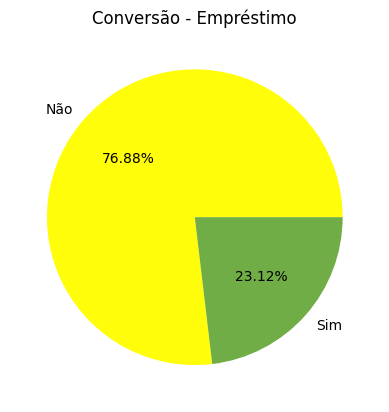

In [55]:

plt.pie(freq_conversao['%'], labels = freq_conversao['Conversões'], autopct='%.2f%%', colors=[colors[1], colors[0]])
plt.title("Conversão - Empréstimo")
plt.show()

In [56]:
freq_abs = pd.DataFrame(crm['Motivo da Perda'].value_counts())
freq_rel = pd.DataFrame(crm['Motivo da Perda'].value_counts(1)*100)
freq_motivo_perda = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_motivo_perda.columns = ['Motivo da Perda', 'Qtde', '%']
freq_motivo_perda.round({'%': 2})



,Motivo da Perda,Qtde,%
0,Não retornou contato,1304,78.60
1,Preço alto,136,8.20
2,Vai deixar para outro momento,90,5.42
3,Não tem interesse,81,4.88
4,Outros,38,2.29
5,Vai fechar com a concorrência,10,0.60


78,60% dos clientes não retornaram contato.

In [57]:
freq_motivo_perda['% acumulado'] = freq_motivo_perda['Qtde'].cumsum()/freq_motivo_perda['Qtde'].sum()*100
freq_motivo_perda = freq_motivo_perda.round({'%': 2,	'% acumulado': 2})

<ipython-input-58-c43ab32b5c7b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
<ipython-input-58-c43ab32b5c7b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
<ipython-input-58-c43ab32b5c7b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax.get_xticklabels(), fontsize=14)
<ipython-input-58-c43ab32b5c7b>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax.get_yticklabels(), fontsize=16)


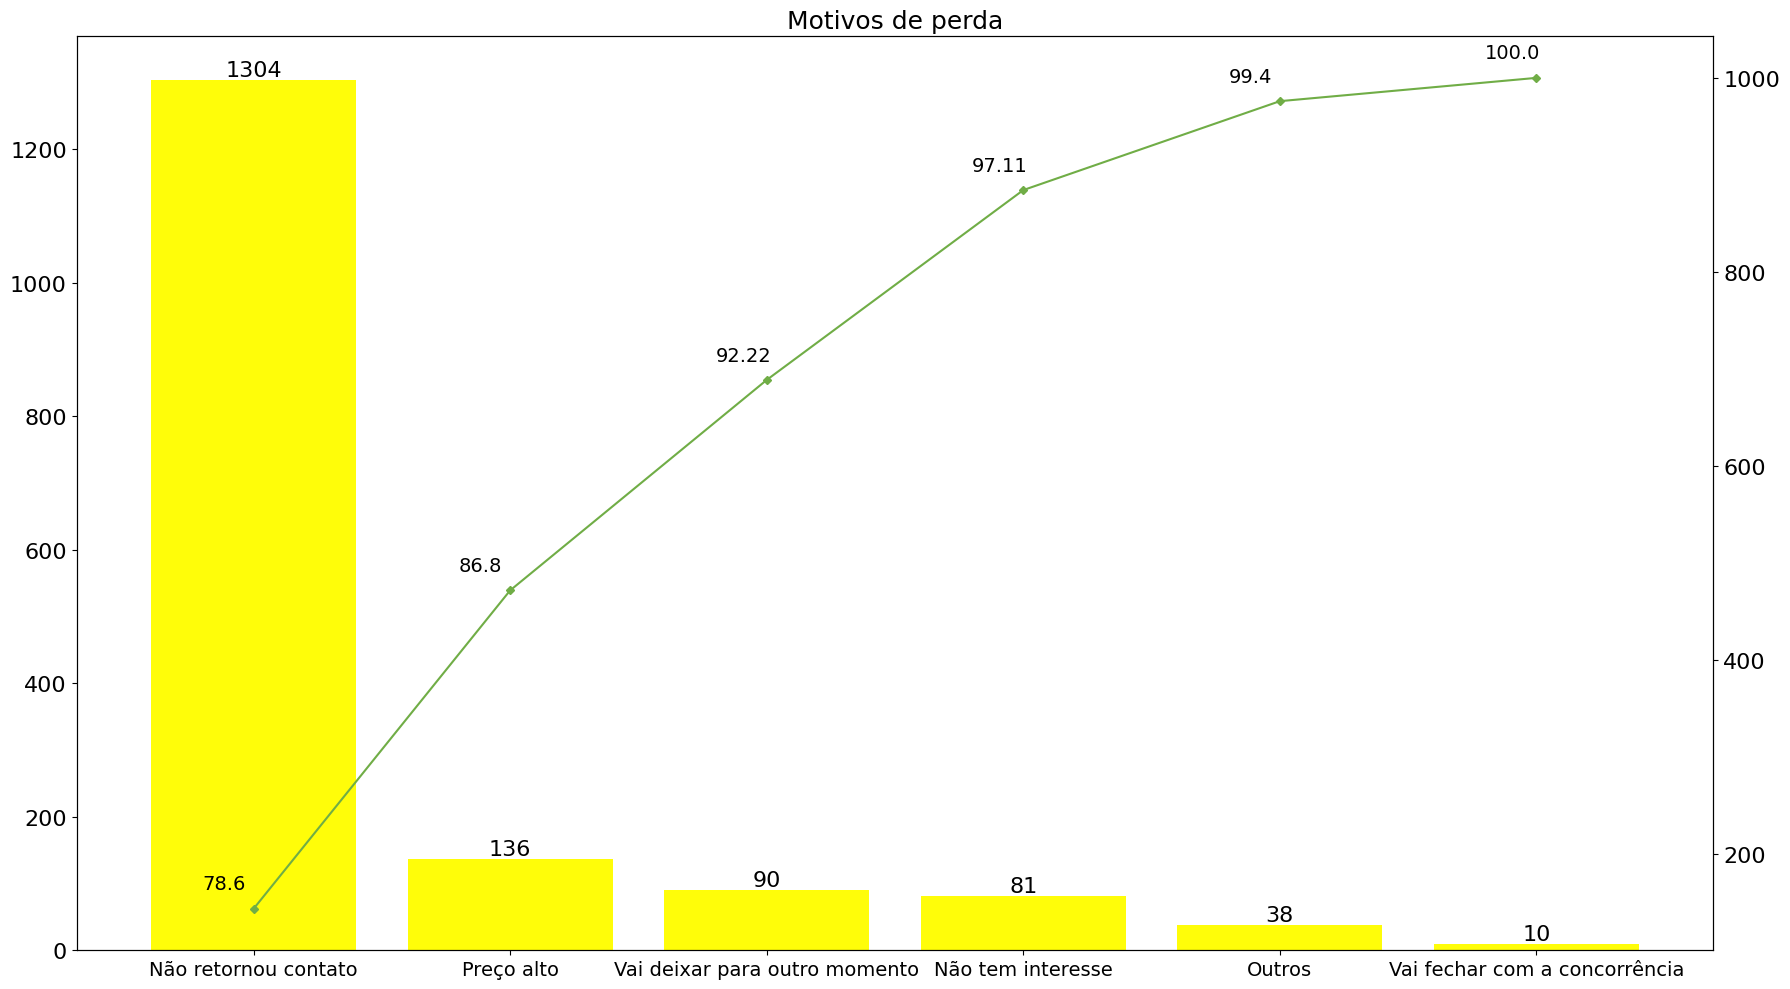

In [58]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['Qtde'], color=colors[1])
ax.bar_label(ax.containers[0], fontsize=16)



ax2 = ax.twinx()
ax2.plot(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['% acumulado'], color=colors[0], marker="D", ms=4)
for x_val, y_val in zip (range(len(freq_motivo_perda)), freq_motivo_perda['% acumulado'].round(2)):
    ax2.text(
        x=x_val-0.2,
        y=y_val+0.5,
        s=y_val, 
        fontsize=14
    )
ax2.yaxis.set_major_formatter(PercentFormatter())


plt.title("Motivos de perda", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
ax2.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax2.set_yticklabels(ax.get_yticklabels(), fontsize=16)


plt.tight_layout()

plt.show();

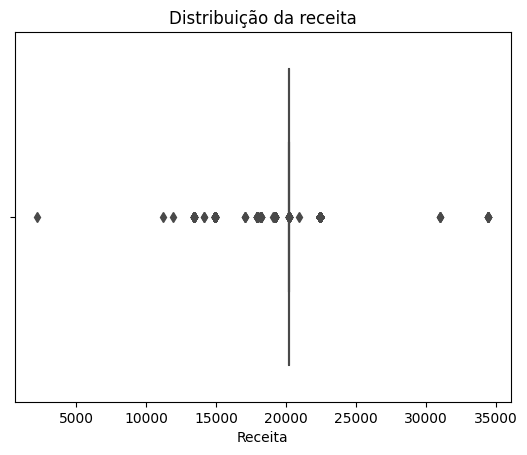

In [59]:
sns.boxplot(x=crm["Receita"], palette = colors)
plt.title("Distribuição da receita")
plt.show();

Análise bivariada

In [60]:
#leads por vendedor
leads_vendedor = pd.DataFrame(crm['Vendedor'].value_counts(dropna=False).reset_index())
leads_vendedor.columns = ['Vendedor', 'Qtde leads']
perc_leads_vendedor = pd.DataFrame(crm['Vendedor'].value_counts(1, dropna=False)*100).reset_index()
perc_leads_vendedor.columns = ['Vendedor', '% leads']
lead_v = leads_vendedor.merge(perc_leads_vendedor, how='left')
lead_v = lead_v.round({'% leads': 2}).sort_values(by=['Vendedor'])
lead_v

,Vendedor,Qtde leads,% leads
0,A,460,21.32
4,B,407,18.86
3,C,422,19.56
1,D,441,20.44
2,E,428,19.83


Os leads estão bem distribuídos pelo vendedores

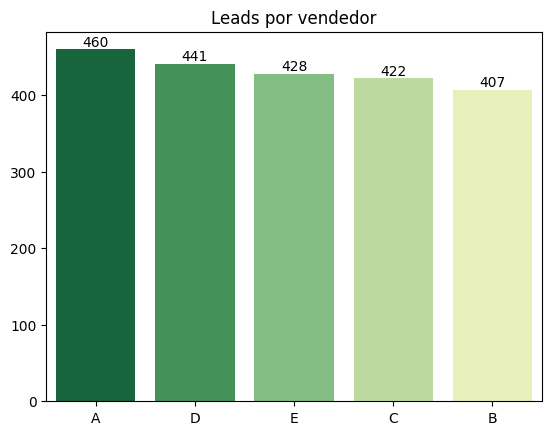

In [61]:
ax = sns.countplot(x = crm['Vendedor'], palette='YlGn_r', order = crm['Vendedor'].value_counts(dropna=False).index)
ax.bar_label(ax.containers[0])
plt.title("Leads por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [62]:
#conversões por vendedor 
conversoes_vendedor = pd.DataFrame(crm[crm['Conversões'] == "Sim"]['Vendedor'].value_counts(dropna=False).reset_index())
conversoes_vendedor.columns = leads_vendedor.columns = ['Vendedor', 'Qtde conversões']
perc_conversoes_vendedor = pd.DataFrame((crm[crm['Conversões'] == "Sim"]['Vendedor'].value_counts(1, dropna=False)*100).reset_index())
perc_conversoes_vendedor.columns = leads_vendedor.columns = ['Vendedor', '% conversões']
conversoes_v = conversoes_vendedor.merge(perc_conversoes_vendedor, how='left').sort_values(by=['Vendedor'])
conversoes_v.round({'% conversões': 2})


,Vendedor,Qtde conversões,% conversões
0,A,104,20.84
1,B,104,20.84
4,C,93,18.64
3,D,95,19.04
2,E,103,20.64


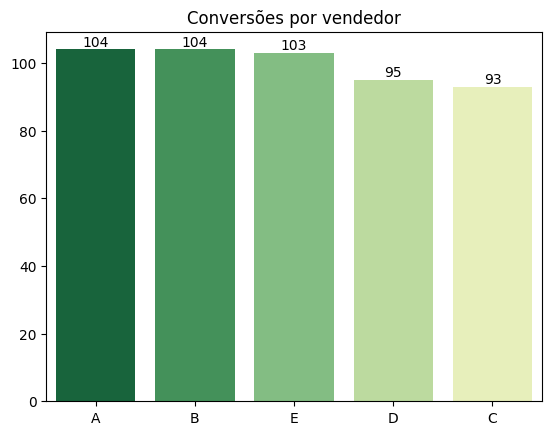

In [63]:
ax = sns.countplot(x = crm[crm['Conversões'] == "Sim"]['Vendedor'], palette='YlGn_r', order = crm[crm['Conversões'] == "Sim"]['Vendedor'].value_counts(dropna=False).index)
ax.bar_label(ax.containers[0])
plt.title("Conversões por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [64]:
#junção das bases leads/vendedor e conversoes/vendedor
lead_conv = lead_v.merge(conversoes_v, how='left')

In [65]:
#cálculo da relação conversões/leads
lead_conv['conv/leads'] = lead_conv['Qtde conversões']/lead_conv['Qtde leads']*100

In [66]:
lead_conv.round({'% leads': 2, '% conversões': 2, 'conv/leads': 2}).sort_values(by="Vendedor")

,Vendedor,Qtde leads,% leads,Qtde conversões,% conversões,conv/leads
0,A,460,21.32,104,20.84,22.61
1,B,407,18.86,104,20.84,25.55
2,C,422,19.56,93,18.64,22.04
3,D,441,20.44,95,19.04,21.54
4,E,428,19.83,103,20.64,24.07


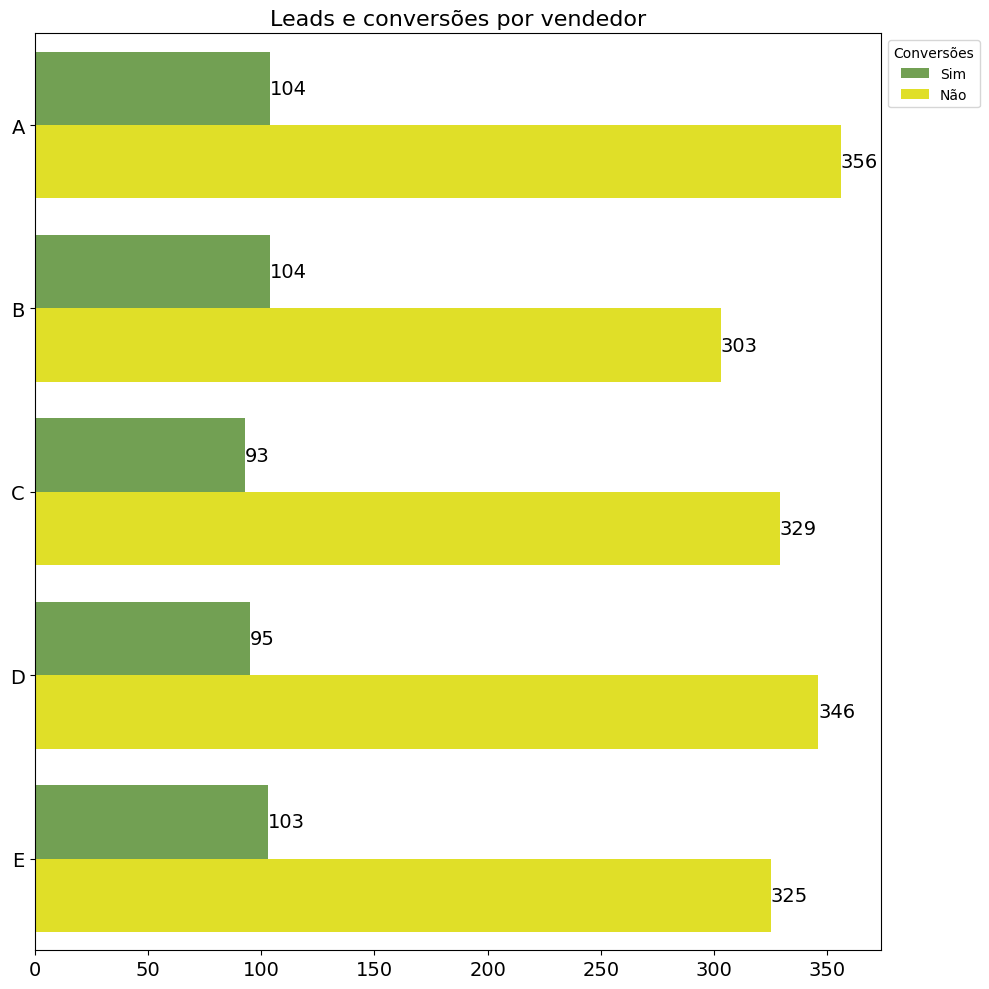

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=crm, y='Vendedor', hue='Conversões', palette=colors, order=['A', 'B', 'C', 'D', 'E'])
ax.bar_label(ax.containers[0], fontsize=14)
ax.bar_label(ax.containers[1], fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Leads e conversões por vendedor", fontsize=16)
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [68]:
freq_abs = pd.DataFrame(crm['Vendedor'].value_counts())
freq_rel = pd.DataFrame(crm['Vendedor'].value_counts(1)*100).round(2)
freq_vendedor = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_vendedor.columns = ['Vendedor', 'Qtde', '%']
freq_abs_sim = crm[crm['Conversões']=="Sim"]['Vendedor'].value_counts(dropna=False).reset_index()
freq_abs_sim.columns = ['Vendedor', 'Sim']
freq_abs_nao = crm[crm['Conversões']=="Não"]['Vendedor'].value_counts(dropna=False).reset_index()
freq_abs_nao.columns = ['Vendedor', 'Não']
freq_rel_sim = crm[crm['Conversões']=="Sim"]['Vendedor'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_sim.columns = ['Vendedor', '% Sim']
freq_rel_nao = crm[crm['Conversões']=="Não"]['Vendedor'].value_counts(1, dropna=False).reset_index().round(2)
freq_rel_nao.columns = ['Vendedor', '% Não']
freq_IV_vendedor = freq_vendedor.merge(freq_abs_sim.merge(freq_abs_nao.merge(freq_rel_sim.merge(freq_rel_nao, how='outer'), how='outer'), how='outer'), how='outer')
freq_IV_vendedor.fillna(0, inplace=True)
freq_IV_vendedor['Sim'] = freq_IV_vendedor['Sim'].astype(int)
freq_IV_vendedor['% taxa de Sim'] = (freq_IV_vendedor['Sim']/freq_IV_vendedor['Qtde'] * 100).round(2)
freq_IV_vendedor['Odds'] = (freq_IV_vendedor['% Sim']/freq_IV_vendedor['% Não']).round(2)
freq_IV_vendedor['LN(Odds)'] = np.log(freq_IV_vendedor['Odds']).round(2)
freq_IV_vendedor['IV'] = ((freq_IV_vendedor['% Sim']-freq_IV_vendedor['% Não'])*freq_IV_vendedor['LN(Odds)']).round(2)
freq_IV_vendedor.replace([np.inf, -np.inf], 0, inplace=True)
freq_IV_vendedor.fillna(0, inplace=True)
freq_IV_vendedor.sort_values("% taxa de Sim", ascending = False)

,Vendedor,Qtde,%,Sim,Não,% Sim,% Não,% taxa de Sim,Odds,LN(Odds),IV
4,B,407,18.86,104,303,0.21,0.18,25.55,1.17,0.16,0.0
2,E,428,19.83,103,325,0.21,0.20,24.07,1.05,0.05,0.0
0,A,460,21.32,104,356,0.21,0.21,22.61,1.00,0.00,0.0
3,C,422,19.56,93,329,0.19,0.20,22.04,0.95,-0.05,0.0
1,D,441,20.44,95,346,0.19,0.21,21.54,0.90,-0.11,0.0


O IV (information value) é muito baixo. Desta forma a variável vendedor não influencia a receita.

In [69]:
#Receitas
crm[crm['Conversões']=='Sim']['Receita'].sum().round(2)

9735383.85

In [70]:
#percentual das receitas sobre o total
(crm[crm['Conversões']=='Sim']['Receita'].sum()/crm['Receita'].sum()*100).round(2)

22.35

In [71]:
receita_vendedor = crm['Receita'].groupby(crm['Vendedor']).sum().reset_index()
receita_vendedor.columns = ['Vendedor','Receita projetada']
receita_vendedor_perc = (crm['Receita'].groupby(crm['Vendedor']).sum()/crm['Receita'].sum()*100).reset_index().round(2)
receita_vendedor_perc.columns = ['Vendedor', '% receita projetada']
receita_vendedor_conv = crm[crm['Conversões']=='Sim']['Receita'].groupby(crm['Vendedor']).sum().reset_index()
receita_vendedor_conv.columns = ['Vendedor','Receita realizada']
receita_vendedor_conv_perc = (crm[crm['Conversões']=='Sim']['Receita'].groupby(crm['Vendedor']).sum()/crm[crm['Conversões']=='Sim']['Receita'].sum()*100).reset_index().round(2)
receita_vendedor_conv_perc.columns = ['Vendedor','% receita realizada']
receita_realizada_projetada_vendedor = pd.merge(pd.merge(pd.merge(receita_vendedor, receita_vendedor_perc, on = 'Vendedor'), receita_vendedor_conv, on = 'Vendedor'), receita_vendedor_conv_perc, on = 'Vendedor').round(2)
receita_realizada_projetada_vendedor['realizada/projetada'] = (receita_realizada_projetada_vendedor['Receita realizada']/receita_realizada_projetada_vendedor['Receita projetada']*100).round(2)
receita_realizada_projetada_vendedor

,Vendedor,Receita projetada,% receita projetada,Receita realizada,% receita realizada,realizada/projetada
0,A,9269181.90,21.28,2023026.90,20.78,21.83
1,B,8285038.65,19.02,2068453.65,21.25,24.97
2,C,8516622.30,19.56,1797927.30,18.47,21.11
3,D,8902353.00,20.44,1880748.00,19.32,21.13
4,E,8577648.00,19.70,1965228.00,20.19,22.91


Os vendedores performam de forma muito similar.

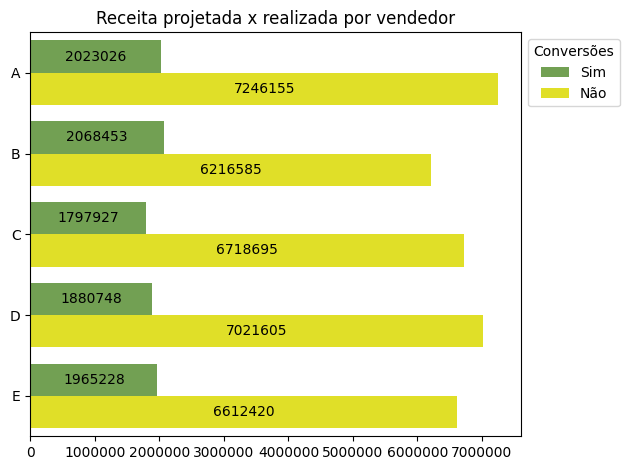

In [72]:

ax = sns.barplot(data=crm, x='Receita', y='Vendedor', estimator=sum, hue='Conversões', palette= colors, errorbar=None, order=['A', 'B', 'C', 'D', 'E'])
ax.bar_label(ax.containers[0], fmt = '%d', fontsize=10, label_type='center')
ax.bar_label(ax.containers[1], fmt = '%d', fontsize=10, label_type='center')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Receita projetada x realizada por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


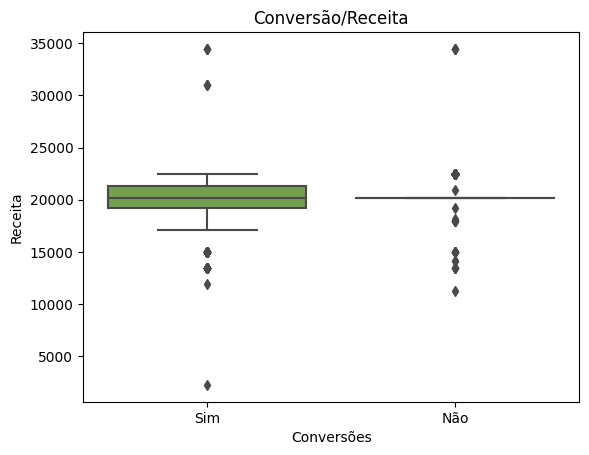

In [73]:
sns.boxplot(data=crm, x="Conversões", y="Receita", palette = colors)
plt.title("Conversão/Receita")
plt.show()

In [74]:
#extração do mês de conversão e do lead
crm['Mês da conversão'] = crm['Data da Conversão'].dt.to_period('M')
crm['Mês do lead'] = crm['Data do Lead'].dt.to_period('M')

In [75]:
#Leads por mês
quant_leads = pd.DataFrame(crm.groupby('Mês do lead')['Receita'].count().reset_index())
quant_leads.columns= ['mês do lead', 'Qtde leads']
perc_leads = pd.DataFrame(crm.groupby('Mês do lead')['Receita'].count()/crm['Receita'].count()*100).reset_index()
perc_leads.columns = ['mês do lead', '% leads']
leads = quant_leads.merge(perc_leads, how='left')
leads = leads.round({'% leads': 2})
leads

,mês do lead,Qtde leads,% leads
0,2022-09,91,4.22
1,2022-10,180,8.34
2,2022-11,414,19.18
3,2022-12,395,18.30
4,2023-01,585,27.11
5,2023-02,493,22.85


A quantidade de leads vem aumentando com o passar dos meses até 02/2023 quando há queda em relação ao mês anterior (de 27,11% para 22,85%).

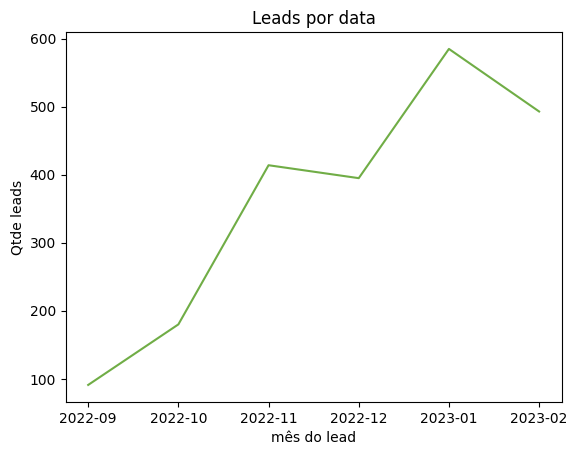

In [76]:
sns.lineplot(data=quant_leads, x=quant_leads["mês do lead"].astype(str), y="Qtde leads", color="#70AD46");
plt.title("Leads por data");
plt.show();

In [77]:
quant_conversoes = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].count().reset_index())
quant_conversoes.columns= ['mês do lead', 'Qtde conversões']
perc_conversoes = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].count()/crm[crm['Conversões']=='Sim']['Receita'].count()*100).reset_index()
perc_conversoes.columns = ['mês do lead', '% conversões']
conversoes = quant_conversoes.merge(perc_conversoes, how='left')
conversoes = conversoes.round({'% conversões': 2})
conversoes

,mês do lead,Qtde conversões,% conversões
0,2022-09,70,14.03
1,2022-10,72,14.43
2,2022-11,150,30.06
3,2022-12,56,11.22
4,2023-01,80,16.03
5,2023-02,71,14.23


In [78]:
leads_conversoes = leads.merge(conversoes, how='left')
leads_conversoes['conversão/leads'] = (leads_conversoes['Qtde conversões']/leads_conversoes['Qtde leads']*100).round(2)
leads_conversoes

,mês do lead,Qtde leads,% leads,Qtde conversões,% conversões,conversão/leads
0,2022-09,91,4.22,70,14.03,76.92
1,2022-10,180,8.34,72,14.43,40.00
2,2022-11,414,19.18,150,30.06,36.23
3,2022-12,395,18.30,56,11.22,14.18
4,2023-01,585,27.11,80,16.03,13.68
5,2023-02,493,22.85,71,14.23,14.40


No decorrer dos meses, há aumento dos leads, porém as conversões caem no mês de 12/2022 e voltam aos patamares do início do período sob análise. A relação conversão/leads cai no decorrer dos meses.

In [79]:
lead_plot = leads_conversoes[['mês do lead', '% leads', '% conversões','conversão/leads']]
lead_plot = lead_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="%")

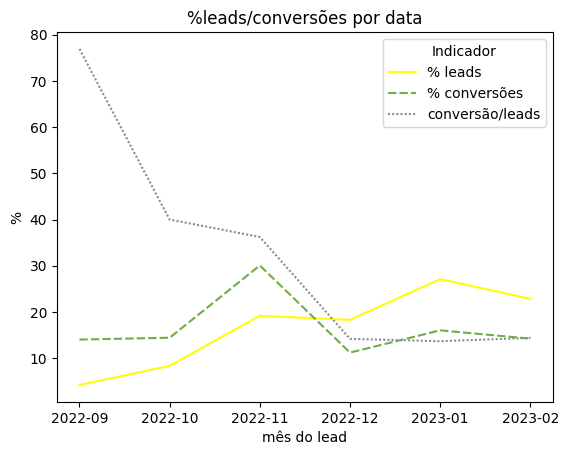

In [80]:
sns.lineplot(data=lead_plot, x=lead_plot['mês do lead'].astype(str), y='%', hue='Indicador', style="Indicador", palette=[colors[1], colors[0], colors[2]]);
plt.title("%leads/conversões por data");
plt.show();

In [81]:

#relação receita esperada x realizada
receita = pd.DataFrame(crm['Receita'].groupby(crm['Data do Lead'].dt.to_period("M")).sum().reset_index())
receita.columns = ['mês do lead', 'Receita projetada']
perc_receita = pd.DataFrame(crm['Receita'].groupby(crm['Data do Lead'].dt.to_period("M")).sum()/crm['Receita'].sum()*100).reset_index()
perc_receita.columns = ['mês do lead', '% Receita projetada']
lead_receita = receita.merge(perc_receita, how='left')
lead_receita = lead_receita.round({'% Receita projetada': 2})
receita = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].sum().reset_index())
receita.columns = ['mês do lead', 'Receita realizada']
perc_receita = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].sum()/crm[crm['Conversões']=='Sim']['Receita'].sum()*100).reset_index()
perc_receita.columns = ['mês do lead', '% Receita realizada']
conversao_data = receita.merge(perc_receita, how='left')
conversao_data = conversao_data.round({'% Receita realizada': 2})
receita_projetada_realizada = lead_receita.merge(conversao_data, how='left')
receita_projetada_realizada['Realizada/projetada'] = (receita_projetada_realizada['Receita realizada']/receita_projetada_realizada['Receita projetada']*100).round(2)
receita_projetada_realizada

,mês do lead,Receita projetada,% Receita projetada,Receita realizada,% Receita realizada,Realizada/projetada
0,2022-09,1391536.35,3.20,1023481.35,10.51,73.55
1,2022-10,3437192.25,7.89,1271012.25,13.06,36.98
2,2022-11,8352742.05,19.18,3017722.05,31.00,36.13
3,2022-12,8021398.20,18.42,1159978.20,11.92,14.46
4,2023-01,11920950.00,27.37,1701675.00,17.48,14.27
5,2023-02,10427025.00,23.94,1561515.00,16.04,14.98


In [82]:
#transpondo tabela para gerar visualização
receita_plot = receita_projetada_realizada[['mês do lead','% Receita projetada', '% Receita realizada', 'Realizada/projetada']]
receita_plot = receita_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="%")
receita_plot

,mês do lead,Indicador,%
0,2022-09,% Receita projetada,3.20
1,2022-10,% Receita projetada,7.89
2,2022-11,% Receita projetada,19.18
3,2022-12,% Receita projetada,18.42
4,2023-01,% Receita projetada,27.37
5,2023-02,% Receita projetada,23.94
6,2022-09,% Receita realizada,10.51
7,2022-10,% Receita realizada,13.06
8,2022-11,% Receita realizada,31.00
9,2022-12,% Receita realizada,11.92


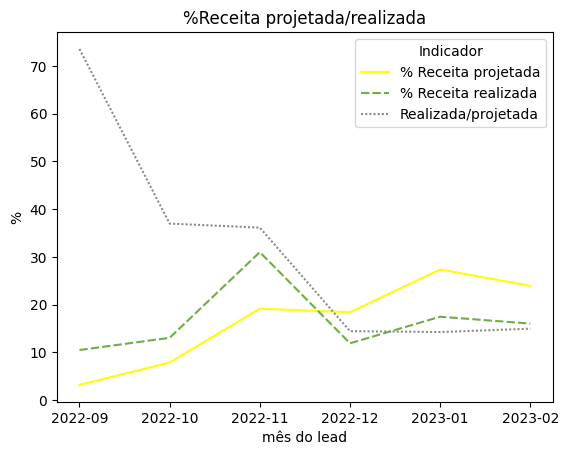

In [83]:
sns.lineplot(data=receita_plot, x=receita_plot["mês do lead"].astype(str), y="%", hue="Indicador", style="Indicador", palette=[colors[1], colors[0], colors[2]]);
plt.ticklabel_format(style='plain', axis='y');
plt.title("%Receita projetada/realizada");
plt.show();

Análise dias de conversão

Observa-se que a maior parte das conversões ocorrem no dia da simulação. Pela análise do boxplot, clientes que contratam acima de 20 dias são outliers.

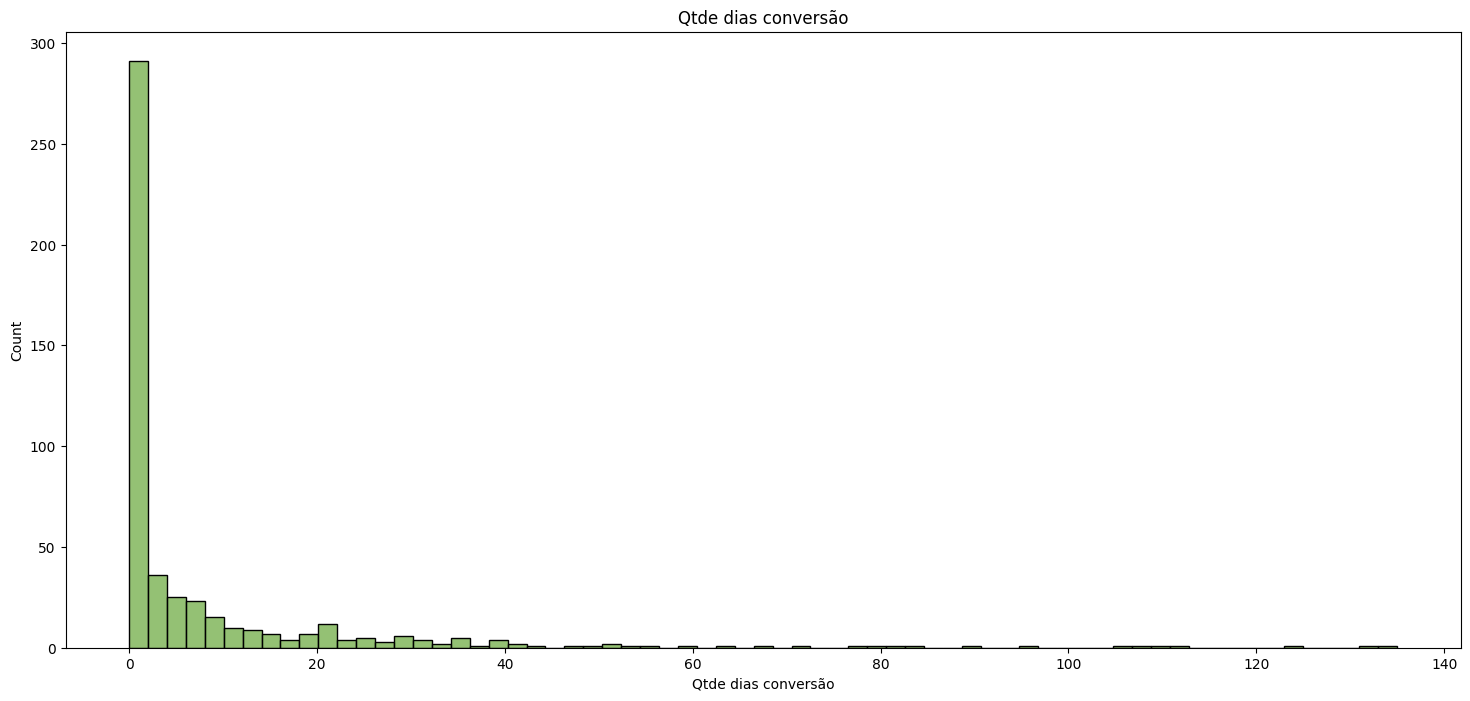

In [84]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=crm, x="Qtde dias conversão", color="#70AD46")
plt.title("Qtde dias conversão")
plt.show()

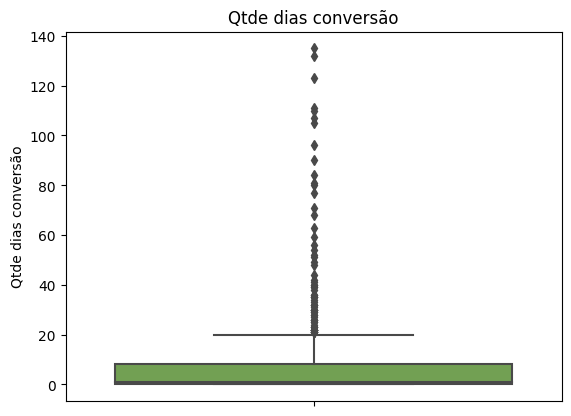

In [85]:
sns.boxplot(data=crm, y="Qtde dias conversão", palette = colors)
plt.title("Qtde dias conversão")
plt.show()

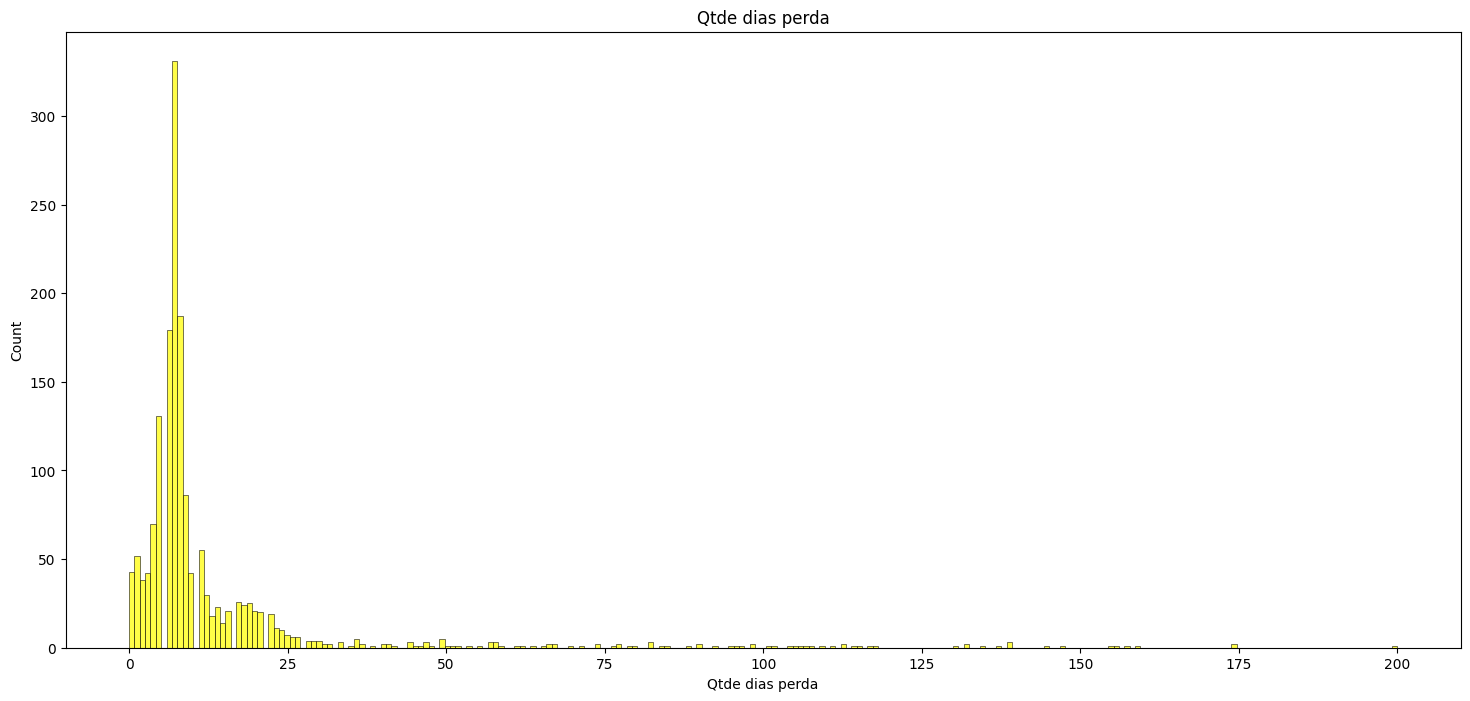

In [86]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=crm, x="Qtde dias perda", color=colors[1])
plt.title("Qtde dias perda")
plt.show()

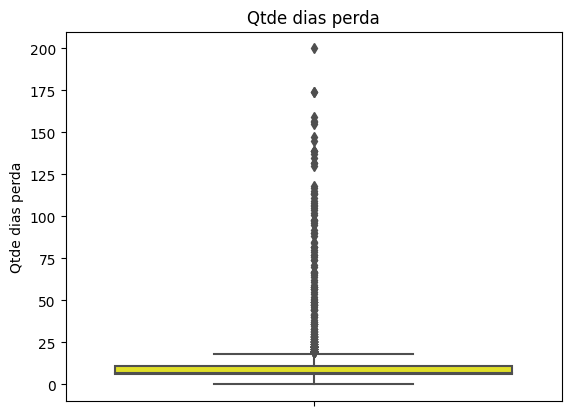

In [87]:
sns.boxplot(data=crm, y="Qtde dias perda", palette = [colors[1]])
plt.title("Qtde dias perda")
plt.show()

In [88]:
motivo_perda = pd.DataFrame(crm.groupby('Vendedor')['Motivo da Perda'].value_counts())
motivo_perda.columns = ['Qtde Motivo da Perda']
perc_motivo_perda = pd.DataFrame(crm.groupby('Vendedor')['Motivo da Perda'].value_counts(1)*100)
perc_motivo_perda.columns = ['% Motivo da Perda']
motivo_perda_final = motivo_perda.merge(perc_motivo_perda, how='left', left_index=True, right_index=True)
motivo_perda_final = motivo_perda_final.round({'% Motivo da Perda': 2}).reset_index()
motivo_perda_final

,Vendedor,Motivo da Perda,Qtde Motivo da Perda,% Motivo da Perda
0,A,Não retornou contato,265,74.44
1,A,Preço alto,31,8.71
2,A,Não tem interesse,24,6.74
3,A,Vai deixar para outro momento,23,6.46
4,A,Outros,10,2.81
5,A,Vai fechar com a concorrência,3,0.84
6,B,Não retornou contato,242,79.87
7,B,Preço alto,24,7.92
8,B,Vai deixar para outro momento,17,5.61
9,B,Não tem interesse,11,3.63


<Axes: xlabel='Qtde Motivo da Perda', ylabel='Motivo da Perda'>

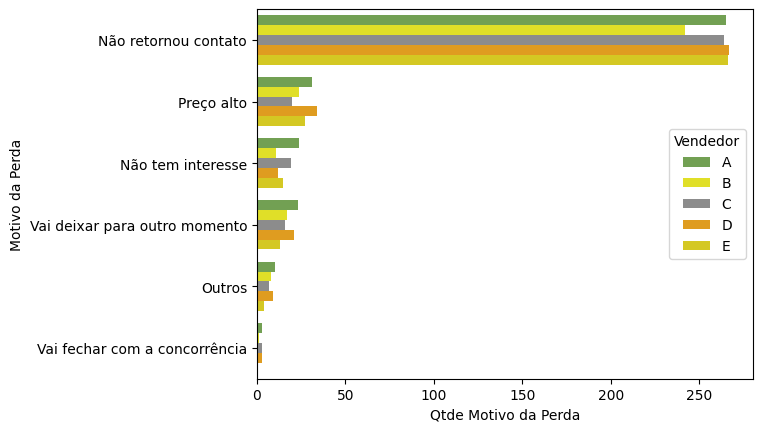

In [89]:
sns.barplot(data = motivo_perda_final, x = 'Qtde Motivo da Perda', hue='Vendedor', y='Motivo da Perda', palette=colors, orient="h")

In [90]:
crm.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_crm_tratada.xlsx", index = False)

## Análise das bases de Marketing



### Google Ads

In [91]:
#lendo a base de Google Ads
google = pd.read_excel("/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Google_Ads.xlsx")

In [92]:
#extraindo mês e incluindo dia da semana
google['Dia da semana'] = google['Dia'].dt.day_name(locale="pt_BR.utf8")
google['Mês'] = google['Dia'].dt.to_period('M')

In [93]:
google.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impressões do anúncio,608.0,18845.53,40517.86,180.0,1290.00,4250.0,31895.0,837730.0
Cliques,608.0,350.94,330.65,0.0,140.00,225.0,400.0,1900.0
Custo,608.0,476.45,451.52,0.0,182.95,375.5,636.1,5651.8
Conversões,608.0,0.23,0.76,0.0,0.00,0.0,0.0,10.0
Receita,608.0,2629.76,8660.29,0.0,0.00,0.0,0.0,135000.0


Os valores médios de conversões e de receita, caem de sexta a domingo.

In [94]:
#Valores médios por dia da semana
google.groupby('Dia da semana')['Impressões do anúncio', 'Cliques', 'Custo', 'Conversões', 'Receita'].mean().round(2)

<ipython-input-94-f100d537fcac>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  google.groupby('Dia da semana')['Impressões do anúncio', 'Cliques', 'Custo', 'Conversões', 'Receita'].mean().round(2)


,Impressões do anúncio,Cliques,Custo,Conversões,Receita
Dia da semana,,,,,
Domingo,17713.61,343.01,386.85,0.12,1606.81
Quarta,17326.05,359.19,511.56,0.23,2871.28
Quinta,17507.73,360.23,507.15,0.34,3470.62
Segunda,18659.78,347.30,496.46,0.31,3393.54
Sexta,25819.78,376.29,505.23,0.13,1994.83
Sábado,16618.80,301.08,406.93,0.11,1944.76
Terça,17989.89,365.78,511.41,0.32,3024.50


In [95]:
#Tipo de campanha
freq_abs = pd.DataFrame(google['Tipo de Campanha'].value_counts())
freq_rel = pd.DataFrame(google['Tipo de Campanha'].value_counts(1)*100)
freq_tipo_campanha = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_tipo_campanha.columns = ['Tipo de Campanha', 'Qtde', '%']
freq_tipo_campanha.round({'%': 2})

,Tipo de Campanha,Qtde,%
0,Institucional,181,29.77
1,Remarketing,177,29.11
2,Conversão,158,25.99
3,Conversão-Youtube,92,15.13


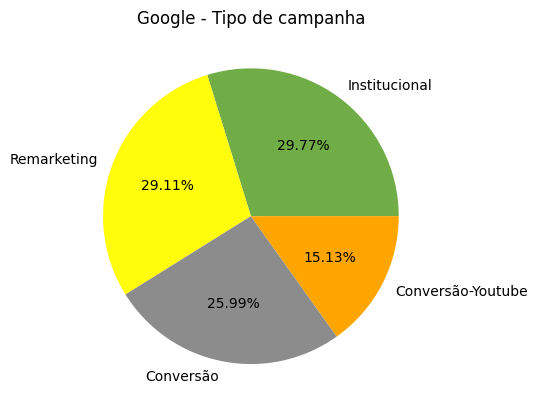

In [96]:
plt.pie(freq_tipo_campanha['%'], labels = freq_tipo_campanha['Tipo de Campanha'], autopct='%.2f%%', colors=colors)
plt.title("Google - Tipo de campanha")
plt.show()

In [97]:
freq_abs = pd.DataFrame(google['Produto/Anúncio'].value_counts())
freq_rel = pd.DataFrame(google['Produto/Anúncio'].value_counts(1)*100)
freq_produto_anuncio = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_produto_anuncio.columns = ['Produto/Anúncio', 'Qtde', '%']
freq_produto_anuncio.round({'%': 2})

,Produto/Anúncio,Qtde,%
0,Empréstimo,608,100.0


O único produto anunciado pelo Google Ads é o empréstimo.

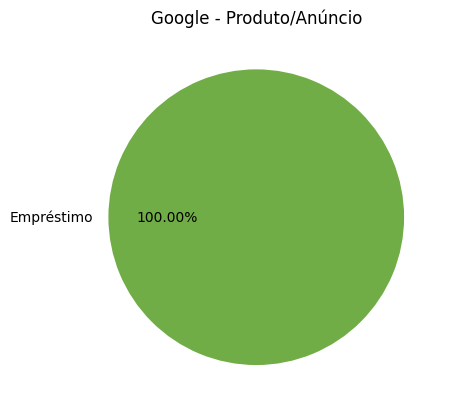

In [98]:
plt.pie(freq_produto_anuncio['%'], labels = freq_produto_anuncio['Produto/Anúncio'], autopct='%.2f%%', colors=colors)
plt.title("Google - Produto/Anúncio")
plt.show()

In [99]:
#impressões de anúncio por mês
freq_abs = pd.DataFrame(google.groupby('Mês')['Impressões do anúncio'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Impressões do anúncio'].sum()/google['Impressões do anúncio'].sum()*100)
freq_impressoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_impressoes.columns = ['Mês', 'Impressões do anúncio', '% Impressões do anúncio']
freq_impressoes = freq_impressoes.round({'% Impressões do anúncio': 2})

In [100]:
#cliques por mês
freq_abs = pd.DataFrame(google.groupby('Mês')['Cliques'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Cliques'].sum()/google['Cliques'].sum()*100)
freq_cliques = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cliques.columns = ['Mês', 'Cliques', '% Cliques']
freq_cliques = freq_cliques.round({'% Cliques': 2})

In [101]:
#conversões por mês
freq_abs = pd.DataFrame(google.groupby('Mês')['Conversões'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Conversões'].sum()/google['Conversões'].sum()*100)
freq_conversoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversoes.columns = ['Mês', 'Conversões', '% Conversões']
freq_conversoes = freq_conversoes.round({'% Conversões': 2})

In [102]:
#consolidação das tabelas anteriores
anuncios_google = freq_impressoes.merge(freq_cliques.merge(freq_conversoes, how='left'), how='left')
anuncios_google['cliques/impressões'] = (anuncios_google['Cliques']/anuncios_google['Impressões do anúncio']*100).round(2)
anuncios_google['conversões/cliques'] = (anuncios_google['Conversões']/anuncios_google['Cliques']*100).round(2)
anuncios_google

,Mês,Impressões do anúncio,% Impressões do anúncio,Cliques,% Cliques,Conversões,% Conversões,cliques/impressões,conversões/cliques
0,2022-09,699620,6.11,11780,5.52,16,11.59,1.68,0.14
1,2022-10,1272750,11.11,20270,9.50,16,11.59,1.59,0.08
2,2022-11,2284600,19.94,25570,11.98,38,27.54,1.12,0.15
3,2022-12,3172150,27.68,48640,22.80,12,8.70,1.53,0.02
4,2023-01,1903010,16.61,52570,24.64,33,23.91,2.76,0.06
5,2023-02,2125950,18.55,54540,25.56,23,16.67,2.57,0.04


In [103]:
anuncios_plot = anuncios_google[['Mês','% Impressões do anúncio', '% Cliques','% Conversões']]
anuncios_plot = anuncios_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="%")

Há um pico de impressões de anúncio em 12/2022, mas nos meses seguintes a quantidade volta ao patamar anterior. Com relação aos cliques, o percentual aumenta no decorrer dos meses, porém as conversões não acompanham essa tendência. Verificam-se dois picos nas conversões o primeiro em 11/2022 e o segundo em 01/2023.

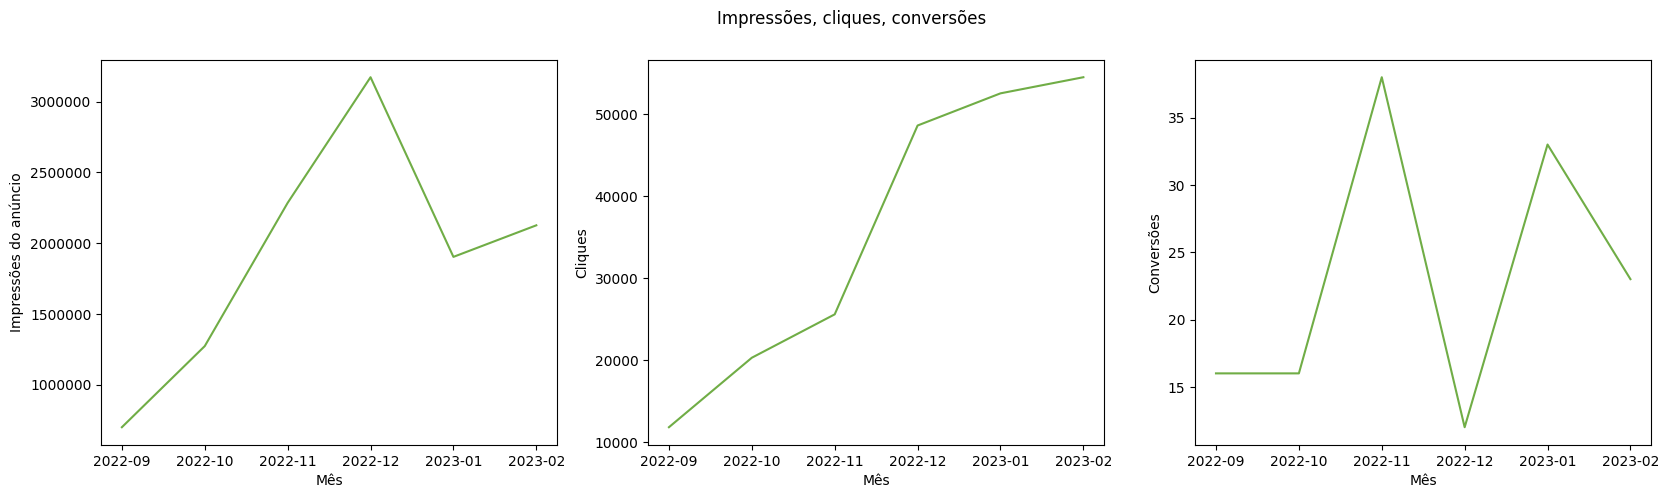

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Impressões, cliques, conversões')
sns.lineplot(ax = ax1, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Impressões do anúncio', color=colors[0]);
ax1.ticklabel_format(style='plain', axis='y')
sns.lineplot(ax = ax2, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Cliques', color=colors[0]);
sns.lineplot(ax = ax3, data=anuncios_google, x=anuncios_google['Mês'].astype(str), y='Conversões', color=colors[0]);
plt.ticklabel_format(style='plain', axis='y')


In [105]:
ads_campanhas = google.groupby('Tipo de Campanha')['Receita','Custo', 'Conversões'].sum().reset_index()
ads_campanhas['ROAS'] = ((ads_campanhas['Receita']-ads_campanhas['Custo']) / ads_campanhas['Custo']).round(2)
ads_campanhas

<ipython-input-105-249341e9aea5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ads_campanhas = google.groupby('Tipo de Campanha')['Receita','Custo', 'Conversões'].sum().reset_index()


,Tipo de Campanha,Receita,Custo,Conversões,ROAS
0,Conversão,160020,123826.5,14,0.29
1,Conversão-Youtube,311550,71743.3,34,3.34
2,Institucional,1029120,38022.8,78,26.07
3,Remarketing,98205,56091.3,12,0.75


A maior parte das conversões é oriunda da campanha institucional, seguida por conversão-Youtube. As campanhas menos rentáveis são a de conversão e de remarketing. Sendo a de conversão a mais custosa.

In [106]:
fig = px.scatter(ads_campanhas, x="Custo", y="Receita", color="Tipo de Campanha", size='Conversões', color_discrete_sequence=colors, title="Campanhas - Google Ads") 
fig.update_layout(
{'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
shapes=[go.layout.Shape(
    type='rect',
    xref='paper',
    yref='paper',
    x0=0,
    y0=0.0,
    x1=1.01,
    y1=1.01,
    line={'width': 1, 'color': 'black'}
)]
)


fig.show()


In [107]:
#campanhas de conversão por mês - receita e custo
ads_campanhas_mes_c = google[google['Tipo de Campanha'].isin(['Conversão'])].groupby('Mês')['Receita','Custo'].sum().reset_index()
ads_campanhas_mes_c

<ipython-input-107-2b0e548cacee>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Mês,Receita,Custo
0,2022-09,14955,10436.6
1,2022-10,14955,22967.7
2,2022-11,51315,14668.5
3,2022-12,18180,11761.0
4,2023-01,60615,28665.3
5,2023-02,0,35327.4


In [108]:
#campanhas de remarketing por mês - receita e custo
ads_campanhas_mes_r = google[google['Tipo de Campanha'].isin(['Remarketing'])].groupby('Mês')['Receita','Custo'].sum().reset_index()
ads_campanhas_mes_r

<ipython-input-108-d8f4ed2a6b4c>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Mês,Receita,Custo
0,2022-09,59820,3619.8
1,2022-10,0,6336.6
2,2022-11,18180,8772.9
3,2022-12,0,13716.0
4,2023-01,0,11723.0
5,2023-02,20205,11923.0


In [109]:
google_plot_c = ads_campanhas_mes_c.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="Valor")

In [110]:
google_plot_r = ads_campanhas_mes_r.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="Valor")

<ipython-input-111-9664eb618693>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



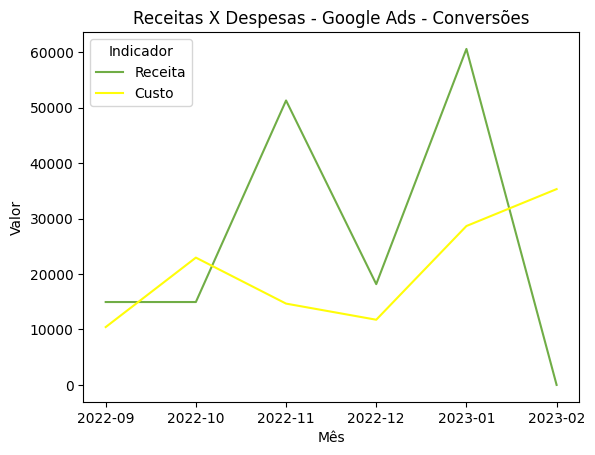

In [111]:
sns.lineplot(data=google_plot_c, x=google_plot_c['Mês'].astype(str), y='Valor', hue='Indicador', palette=colors);
plt.title("Receitas X Despesas - Google Ads - Conversões");
plt.show();

Nos meses de outubro/22 e de 02/23 os custos excederam as receitas para as campanhas de conversão.

<ipython-input-112-6d5e4bad2a6b>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



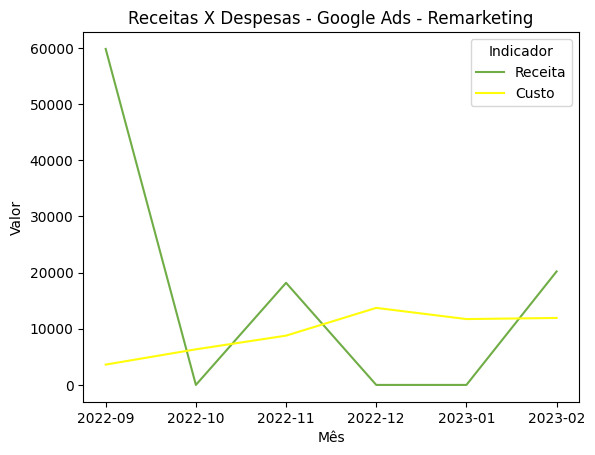

In [112]:
sns.lineplot(data=google_plot_r, x=google_plot_r['Mês'].astype(str), y='Valor', hue='Indicador', palette=colors);
plt.title("Receitas X Despesas - Google Ads - Remarketing");
plt.show();

In [113]:

freq_abs = pd.DataFrame(google.groupby('Mês')['Custo'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Custo'].sum()/google['Custo'].sum()*100)
freq_custos = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_custos.columns = ['Mês', 'Custo', '% Custo']
freq_custos = freq_custos.round({'% Custo': 2})

In [114]:
freq_abs = pd.DataFrame(google.groupby('Mês')['Receita'].sum())
freq_rel = pd.DataFrame(google.groupby('Mês')['Receita'].sum()/google['Receita'].sum()*100)
freq_receita = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_receita.columns = ['Mês', 'Receita', '% Receita']
freq_receita = freq_receita.round({'% Receita': 2})

In [115]:
receita_custo = freq_receita.merge(freq_custos, how='left')
receita_custo['receita/custo'] = receita_custo['Receita']/(receita_custo['Custo']*100)
receita_custo.round(2)

,Mês,Receita,% Receita,Custo,% Custo,receita/custo
0,2022-09,179460,11.22,19747.9,6.82,0.09
1,2022-10,194685,12.18,37308.7,12.88,0.05
2,2022-11,532950,33.33,42643.8,14.72,0.12
3,2022-12,165270,10.34,54064.2,18.66,0.03
4,2023-01,282870,17.69,63057.9,21.77,0.04
5,2023-02,243660,15.24,72861.4,25.15,0.03


A relação receita/custo é baixa no decorrer dos meses.

In [116]:
receita_plot = receita_custo[['Mês','Receita', 'Custo']]
receita_plot = receita_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="R$")

<ipython-input-117-5b6a51d87332>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



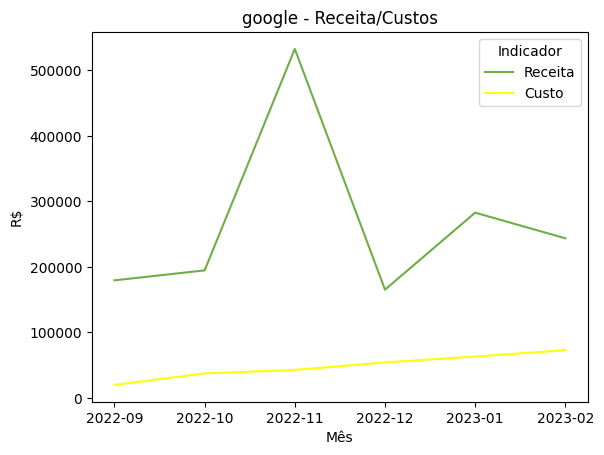

In [117]:
sns.lineplot(data=receita_plot, x=receita_plot['Mês'].astype(str), y='R$', hue='Indicador', palette=colors);
plt.title("google - Receita/Custos");
plt.ticklabel_format(style='plain', axis='y')
plt.show();

#### Análise bivariada


In [118]:
campanha_impressoes = google['Impressões do anúncio'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_impressoes.columns = ['Tipo de Campanha','Impressões do anúncio']
campanha_impressoes_perc = (google['Impressões do anúncio'].groupby(google['Tipo de Campanha']).sum()/google['Impressões do anúncio'].sum()*100).reset_index().round(2)
campanha_impressoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_impressao = pd.merge(campanha_impressoes, campanha_impressoes_perc, on = 'Tipo de Campanha')
freq_campanha_impressao

,Tipo de Campanha,Impressões do anúncio,%
0,Conversão,527410,4.60
1,Conversão-Youtube,4253370,37.12
2,Institucional,196080,1.71
3,Remarketing,6481220,56.56


56,56% das impressões de anúncios são de remarketing, seguido por Conversão - Youtube com 37,12% 

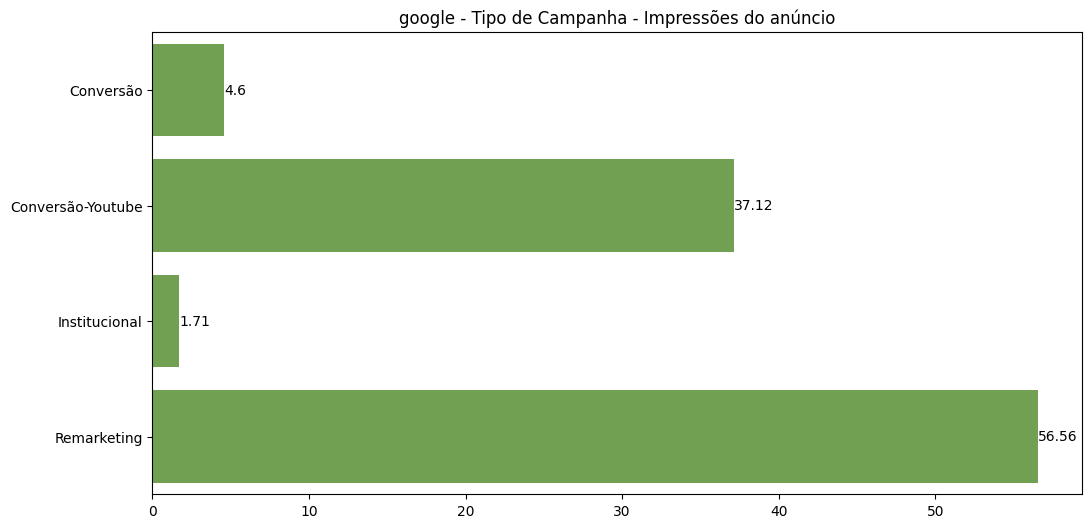

In [119]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_impressao, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [120]:
campanha_cliques = google['Cliques'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_cliques.columns = ['Tipo de Campanha','Cliques']
campanha_cliques_perc = (google['Cliques'].groupby(google['Tipo de Campanha']).sum()/google['Cliques'].sum()*100).reset_index().round(2)
campanha_cliques_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cliques = pd.merge(campanha_cliques, campanha_cliques_perc, on = 'Tipo de Campanha')
freq_campanha_cliques

,Tipo de Campanha,Cliques,%
0,Conversão,40710,19.08
1,Conversão-Youtube,30530,14.31
2,Institucional,32420,15.19
3,Remarketing,109710,51.42


51,42% dos cliques são feitos em campanhas de remarketing.

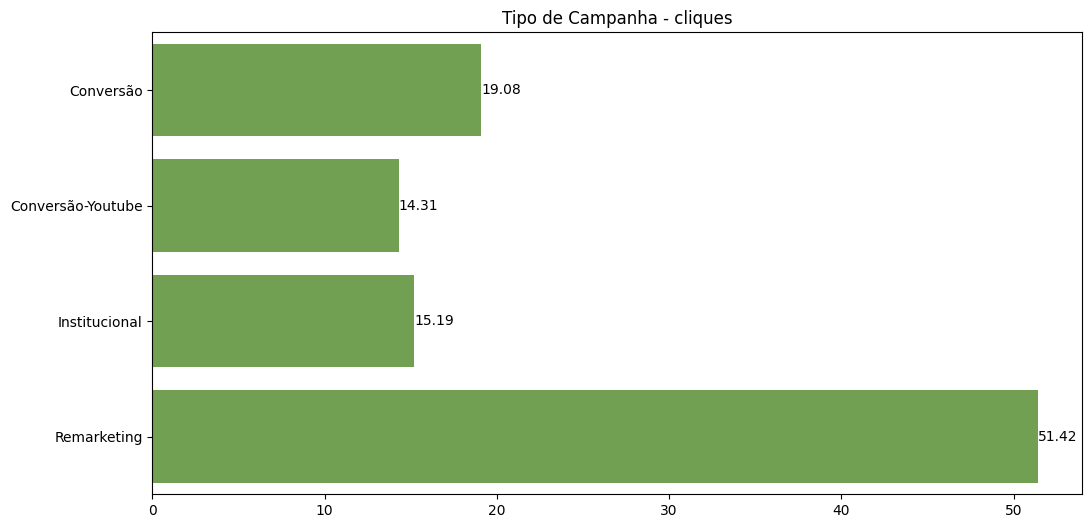

In [121]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cliques, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Tipo de Campanha - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [122]:
campanha_custo = google['Custo'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_custo.columns = ['Tipo de Campanha','Custo']
campanha_custo_perc = (google['Custo'].groupby(google['Tipo de Campanha']).sum()/google['Custo'].sum()*100).reset_index().round(2)
campanha_custo_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_custo = pd.merge(campanha_custo, campanha_custo_perc, on = 'Tipo de Campanha')
freq_campanha_custo

,Tipo de Campanha,Custo,%
0,Conversão,123826.5,42.75
1,Conversão-Youtube,71743.3,24.77
2,Institucional,38022.8,13.13
3,Remarketing,56091.3,19.36


Conversão tem o menor percentual de impressões, porém tem o maior percentual de custo com participação de 42,75% nos custos. É necessário verificar.

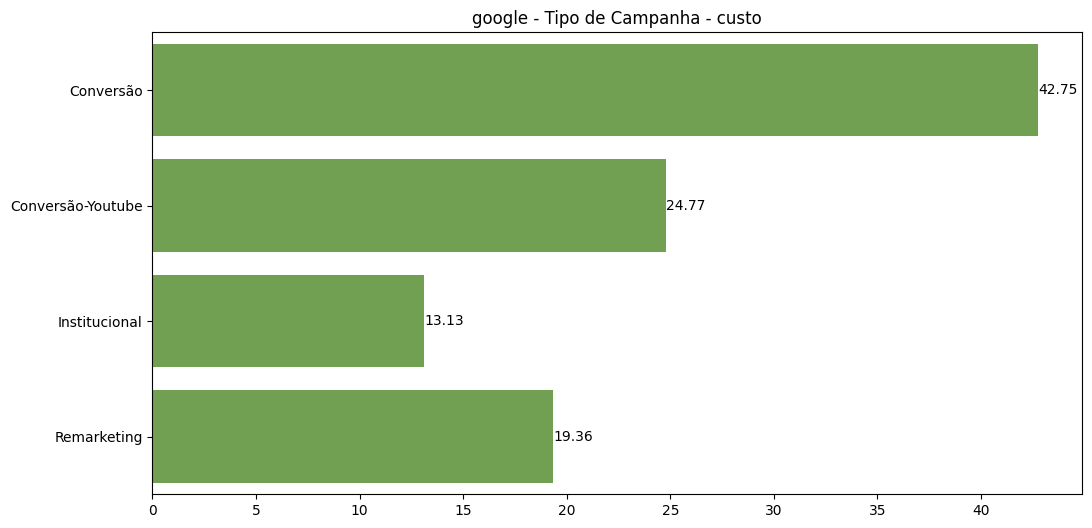

In [123]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_custo, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [124]:
campanha_conversoes = google['Conversões'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_conversoes.columns = ['Tipo de Campanha','Conversões']
campanha_conversoes_perc = (google['Conversões'].groupby(google['Tipo de Campanha']).sum()/google['Conversões'].sum()*100).reset_index().round(2)
campanha_conversoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_conversoes = pd.merge(campanha_conversoes, campanha_conversoes_perc, on = 'Tipo de Campanha')
freq_campanha_conversoes

,Tipo de Campanha,Conversões,%
0,Conversão,14,10.14
1,Conversão-Youtube,34,24.64
2,Institucional,78,56.52
3,Remarketing,12,8.70


Verifica-se que a maior parte das conversões são oriundas da campanha institucional (56,52%).

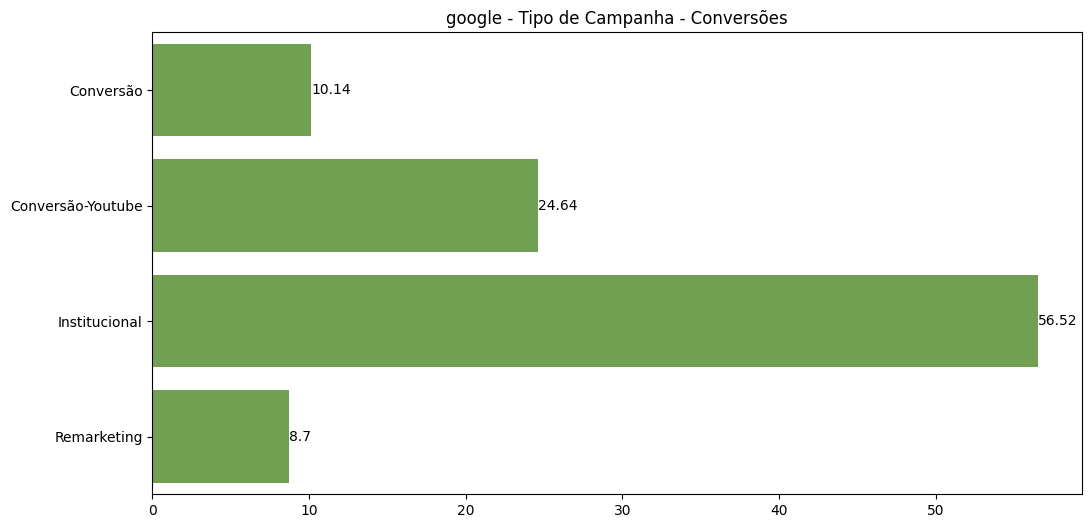

In [125]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_conversoes, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [126]:
campanha_receita = google['Receita'].groupby(google['Tipo de Campanha']).sum().reset_index()
campanha_receita.columns = ['Tipo de Campanha','Receita']
campanha_receita_perc = (google['Receita'].groupby(google['Tipo de Campanha']).sum()/google['Receita'].sum()*100).reset_index().round(2)
campanha_receita_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_receita = pd.merge(campanha_receita, campanha_receita_perc, on = 'Tipo de Campanha')
freq_campanha_receita

,Tipo de Campanha,Receita,%
0,Conversão,160020,10.01
1,Conversão-Youtube,311550,19.49
2,Institucional,1029120,64.36
3,Remarketing,98205,6.14


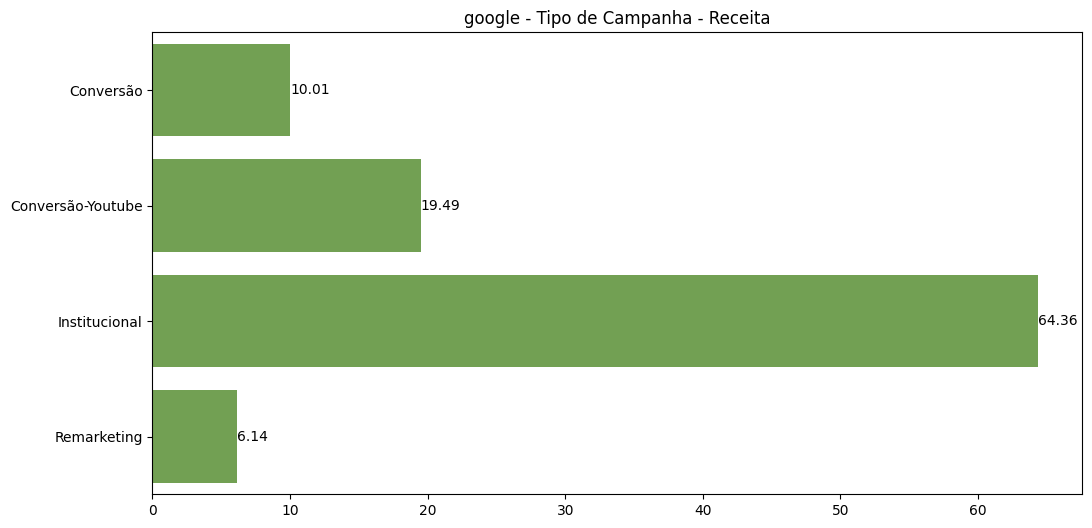

In [127]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_receita, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('google - Tipo de Campanha - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

A campanha institucional é responsável pelo maior percentual das receitas também.

In [128]:
google.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_google_tratada.xlsx", index = False)

### Google Analytics

In [129]:
google_analytics = pd.read_excel("/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Google_Analytics.xlsx")

In [130]:
google_analytics.head()

,Data de Acesso,Acessos ao Site
0,2022-09-01,2432
1,2022-09-02,2128
2,2022-09-03,2280
3,2022-09-04,1596
4,2022-09-05,2432


In [131]:
google_analytics['Mês de acesso'] = google_analytics['Data de Acesso'].dt.to_period("M")

In [132]:
google_analytics.describe()

,Acessos ao Site
count,181.000000
mean,7855.712707
std,3198.717994
min,1596.000000
25%,5472.000000
50%,8284.000000
75%,10336.000000
max,15276.000000


<ipython-input-133-a2b52718fffa>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




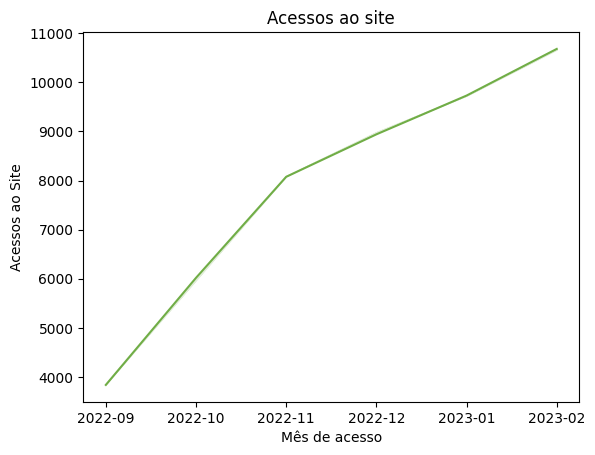

In [133]:
sns.lineplot(data=google_analytics, x=google_analytics["Mês de acesso"].astype(str), y="Acessos ao Site", color=colors[0], sort=False, ci= False);
plt.title("Acessos ao site");
plt.show();

Os acessos ao site cresceram no decorrer do período.

In [134]:
google_analytics.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_google_analytics_tratada.xlsx", index = False)

####Funil - Google

In [136]:
impressoes_google = google['Impressões do anúncio'].sum()
cliques_google = google['Cliques'].sum()
conversoes_google = google['Conversões'].sum()

In [137]:
funil_google = {'Impressões do anúncio': [impressoes_google], 'Cliques': [cliques_google], 'Conversões': [conversoes_google]}

In [138]:
funil_google = pd.DataFrame(data = funil_google).melt()

In [139]:
funil_google.columns = ['Fase google ads', 'Qtde']

In [140]:
ctr_google = cliques_google / impressoes_google * 100
ctr_google.round(2)

1.86

In [141]:
funil_google

,Fase google ads,Qtde
0,Impressões do anúncio,11458080
1,Cliques,213370
2,Conversões,138


In [142]:
fig = px.funnel(funil_google, x='Qtde', y='Fase google ads', color_discrete_sequence = ["#70AD46"])
fig.update_traces(texttemplate="%{value:,d}", textfont = {'color': 'white'})
fig.update_layout(separators = ',.', paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)", font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    font=dict(size=20, color='black'),
    title={
        'text': "",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="black",
    legend_title_font_color="white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ))
fig.update_yaxes(title='')
fig.show()

In [143]:
CTR_google = cliques_google/impressoes_google * 100
CTR_google

1.8621793529107842

In [144]:
TC_google = conversoes_google / cliques_google * 100
TC_google

0.06467638374654357

In [146]:
cpc_google = google['Custo'].sum()/cliques_google
cpc_google

1.3576599334489385

In [147]:
cc_google = google['Custo'].sum()/conversoes_google
cc_google

2099.158695652174

In [148]:
roas_google = (google['Receita'].sum() - google['Custo'].sum())/google['Custo'].sum()
roas_google


4.519447231965601

In [149]:
google[google['Dia'].dt.year==2023]['Receita'].sum()

526530

### Meta Ads

In [150]:
#lendo a base meta ads
meta = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Meta_Ads.xlsx', sheet_name='Meta Ads')


In [151]:
#extraindo mês e incluindo dia da semana
meta['Dia da semana'] = meta['Dia'].dt.day_name(locale="pt_BR.utf8")
meta['Mês'] = meta['Dia'].dt.to_period('M')

In [152]:
meta.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impressões do anúncio,1205.0,42232.82,29948.11,1760.0,18890.0,35600.0,57980.0,230220.00
Cliques,1205.0,256.21,193.79,3.0,110.0,220.0,360.0,1370.00
Custo,1205.0,915.46,575.07,46.3,446.6,833.4,1151.6,3426.10
Cadastros de Conta Corrente,1205.0,3.67,8.53,0.0,0.0,0.0,0.0,60.00
Conversões,1205.0,0.17,0.55,0.0,0.0,0.0,0.0,7.00
Receita,1205.0,3157.52,10160.36,0.0,0.0,0.0,0.0,125508.45


In [153]:
freq_abs = pd.DataFrame(meta['Tipo de Campanha'].value_counts())
freq_rel = pd.DataFrame(meta['Tipo de Campanha'].value_counts(1)*100)
freq_tipo_campanha = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_tipo_campanha.columns = ['Tipo de Campanha', 'Qtde', '%']
freq_tipo_campanha.round({'%': 2})


,Tipo de Campanha,Qtde,%
0,Conversão,941,78.09
1,Remarketing,264,21.91


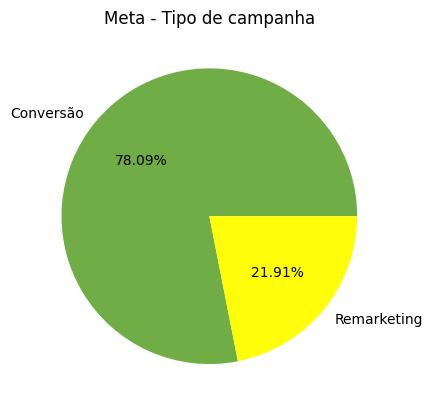

In [154]:
plt.pie(freq_tipo_campanha['%'], labels = freq_tipo_campanha['Tipo de Campanha'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Tipo de campanha")
plt.show()

78,09% das campanhas são de conversão.

In [155]:
freq_abs = pd.DataFrame(meta['Produto/Anúncio'].value_counts())
freq_rel = pd.DataFrame(meta['Produto/Anúncio'].value_counts(1)*100)
freq_produto_anuncio = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_produto_anuncio.columns = ['Produto/Anúncio', 'Qtde', '%']
freq_produto_anuncio.round({'%': 2})


,Produto/Anúncio,Qtde,%
0,Empréstimo,909,75.44
1,Conta Corrente Digital,296,24.56


75,44% delas são para o produto empréstimo.

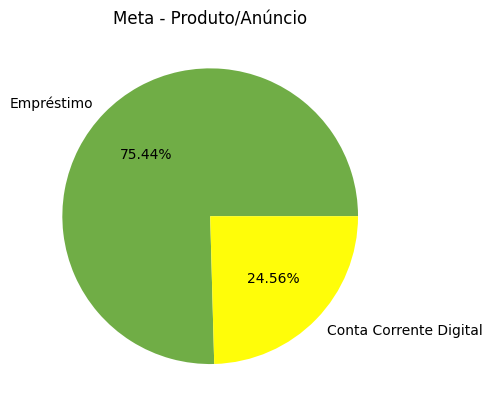

In [156]:
plt.pie(freq_produto_anuncio['%'], labels = freq_produto_anuncio['Produto/Anúncio'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Produto/Anúncio")
plt.show()

In [157]:
freq_abs = pd.DataFrame(meta['Público'].value_counts())
freq_rel = pd.DataFrame(meta['Público'].value_counts(1)*100)
freq_publico = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_publico.columns = ['Público', 'Qtde', '%']
freq_publico.round({'%': 2})


,Público,Qtde,%
0,Cold,941,78.09
1,Hot,264,21.91


O foco está no público cold.

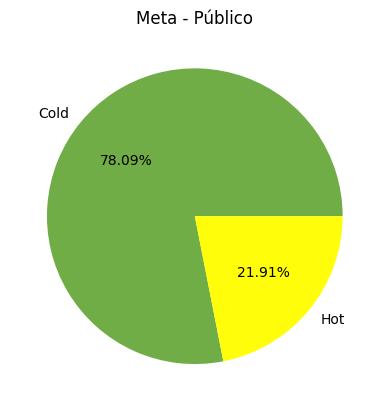

In [158]:
plt.pie(freq_publico['%'], labels = freq_publico['Público'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Público")
plt.show()

In [159]:
meta_campanhas = meta.groupby('Tipo de Campanha')[['Receita', 'Custo', 'Conversões']].sum().reset_index()
meta_campanhas['ROAS'] = ((meta_campanhas['Receita']-meta_campanhas['Custo']) / meta_campanhas['Custo']).round(2)
meta_campanhas

,Tipo de Campanha,Receita,Custo,Conversões,ROAS
0,Conversão,2476550.70,849518.6,131,1.92
1,Remarketing,1328259.45,253611.6,77,4.24


In [160]:
fig = px.scatter(meta_campanhas, x="Custo", y="Receita", color="Tipo de Campanha", size='Conversões', color_discrete_sequence=colors, title="Campanhas - Meta Ads") 
fig.update_layout(
{'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
shapes=[go.layout.Shape(
    type='rect',
    xref='paper',
    yref='paper',
    x0=0,
    y0= 0.0,
    x1=1.01,
    y1=1.02,
    line={'width': 1, 'color': 'black'}
)]
)


fig.show()



In [161]:
meta_campanhas_mes_c = meta[meta['Tipo de Campanha'].isin(['Conversão'])].groupby('Mês')['Receita','Custo'].sum().reset_index()
meta_campanhas_mes_c.columns = ['Mês', 'Receita', 'Custo']
meta_campanhas_mes_c

<ipython-input-161-428b72d6f40d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Mês,Receita,Custo
0,2022-09,131808.60,58169.2
1,2022-10,119219.40,115027.0
2,2022-11,1184986.95,219588.6
3,2022-12,218331.75,162576.8
4,2023-01,323472.00,145486.5
5,2023-02,498732.00,148670.5


In [162]:
meta_campanhas_mes_r = meta[meta['Tipo de Campanha'].isin(['Remarketing'])].groupby('Mês')['Receita','Custo'].sum().reset_index()
meta_campanhas_mes_r.columns = ['Mês', 'Receita', 'Custo']
meta_campanhas_mes_r

<ipython-input-162-5980bcc9dc0d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Mês,Receita,Custo
0,2022-09,172290.60,48001.8
1,2022-10,239754.60,77516.5
2,2022-11,469297.35,44878.7
3,2022-12,58623.90,26477.1
4,2023-01,181953.00,27345.3
5,2023-02,206340.00,29392.2


No caso de meta ads os custos ficam abaixo das receitas.

In [163]:
meta_plot_c = meta_campanhas_mes_c.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="Valor")

In [164]:
meta_plot_r = meta_campanhas_mes_r.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="Valor")

<ipython-input-165-36b0ece444b6>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



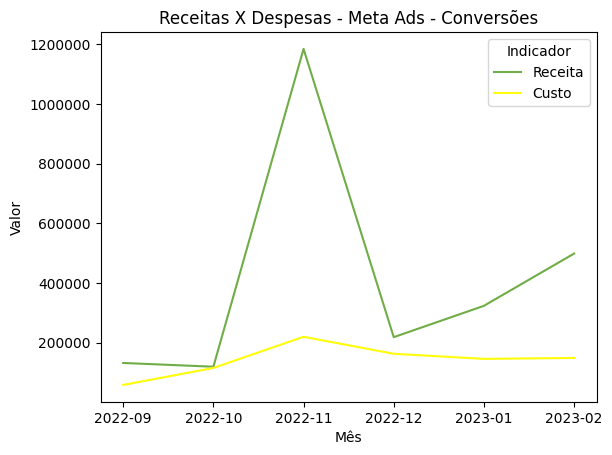

In [165]:
sns.lineplot(data=meta_plot_c, x=meta_plot_c['Mês'].astype(str), y='Valor', hue='Indicador', palette=colors);
plt.ticklabel_format(style='plain', axis='y')
plt.title("Receitas X Despesas - Meta Ads - Conversões");
plt.show();

<ipython-input-166-c70466ef61ed>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



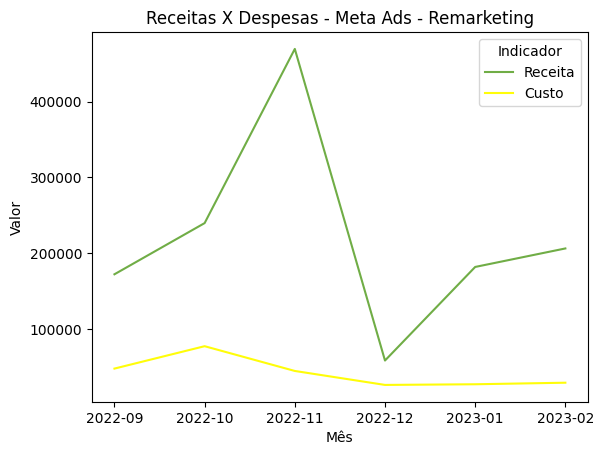

In [166]:
sns.lineplot(data=meta_plot_r, x=meta_plot_r['Mês'].astype(str), y='Valor', hue='Indicador', palette=colors);
plt.title("Receitas X Despesas - Meta Ads - Remarketing");
plt.show();

In [167]:
#impressões por mês
freq_abs = pd.DataFrame(meta.groupby('Mês')['Impressões do anúncio'].sum())
freq_rel = pd.DataFrame(meta.groupby('Mês')['Impressões do anúncio'].sum()/meta['Impressões do anúncio'].sum()*100)
freq_impressoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_impressoes.columns = ['Mês', 'Impressões do anúncio', '% Impressões do anúncio']
freq_impressoes = freq_impressoes.round({'% Impressões do anúncio': 2})


In [168]:
#cliques por mês
freq_abs = pd.DataFrame(meta.groupby('Mês')['Cliques'].sum())
freq_rel = pd.DataFrame(meta.groupby('Mês')['Cliques'].sum()/meta['Cliques'].sum()*100)
freq_cliques = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cliques.columns = ['Mês', 'Cliques', '% cliques']
freq_cliques = freq_cliques.round({'% cliques': 2})

In [169]:
#conversões por mês
freq_abs = pd.DataFrame(meta.groupby('Mês')['Conversões'].sum())
freq_rel = pd.DataFrame(meta.groupby('Mês')['Conversões'].sum()/meta['Conversões'].sum()*100)
freq_conversoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversoes.columns = ['Mês', 'Conversões', '% conversões']
freq_conversoes = freq_conversoes.round({'% conversões': 2})

In [170]:
#dados consolidados
anuncios_meta = freq_impressoes.merge(freq_cliques.merge(freq_conversoes, how='left'), how='left')
anuncios_meta['cliques/impressões'] = (anuncios_meta['Cliques']/anuncios_meta['Impressões do anúncio']*100).round(2)
anuncios_meta['conversões/cliques'] = (anuncios_meta['Conversões']/anuncios_meta['Cliques']*100).round(2)
anuncios_meta

,Mês,Impressões do anúncio,% Impressões do anúncio,Cliques,% cliques,Conversões,% conversões,cliques/impressões,conversões/cliques
0,2022-09,4433470,8.71,26460,8.57,24,11.54,0.60,0.09
1,2022-10,9796530,19.25,53078,17.19,23,11.06,0.54,0.04
2,2022-11,11307700,22.22,72800,23.58,91,43.75,0.64,0.12
3,2022-12,10041820,19.73,56010,18.14,14,6.73,0.56,0.02
4,2023-01,8159100,16.03,47300,15.32,25,12.02,0.58,0.05
5,2023-02,7151930,14.05,53090,17.20,31,14.90,0.74,0.06


In [171]:
anuncios_plot = anuncios_meta[['Mês','% Impressões do anúncio', '% cliques','% conversões']]
anuncios_plot = anuncios_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="%")


In [172]:
anuncios_plot2 = anuncios_meta[['Mês','Impressões do anúncio', 'Cliques','Conversões']]
anuncios_plot2 = anuncios_plot2.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="R$")



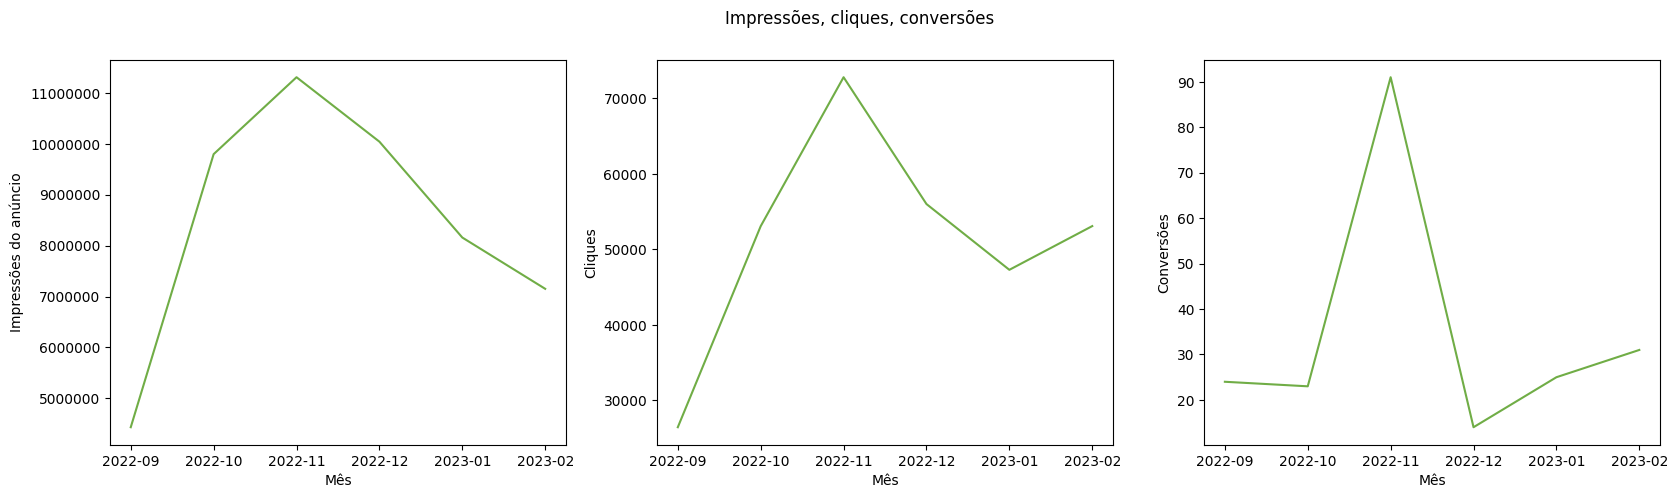

In [173]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Impressões, cliques, conversões')
sns.lineplot(ax = ax1, data=anuncios_meta, x=anuncios_meta['Mês'].astype(str), y='Impressões do anúncio', color=colors[0]);
ax1.ticklabel_format(style='plain', axis='y')
sns.lineplot(ax = ax2, data=anuncios_meta, x=anuncios_meta['Mês'].astype(str), y='Cliques', color=colors[0]);
sns.lineplot(ax = ax3, data=anuncios_meta, x=anuncios_meta['Mês'].astype(str), y='Conversões', color=colors[0]);
plt.ticklabel_format(style='plain', axis='y')




Para o meta ads, pode-se observar um pico de impressões, cliques e conversões no mês 11/2022

<ipython-input-174-dcd79f061364>:1: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



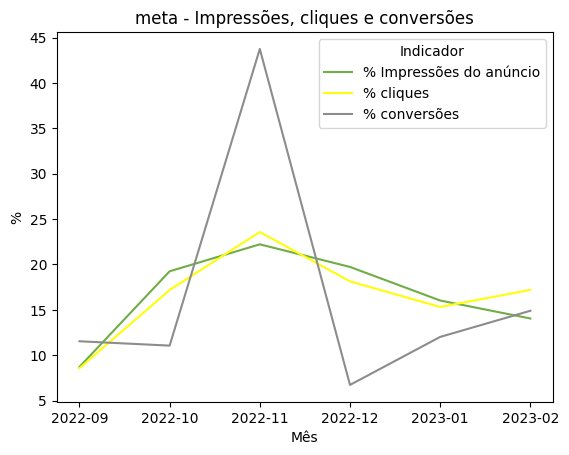

In [174]:
sns.lineplot(data=anuncios_plot, x=anuncios_plot['Mês'].astype(str), y='%', hue='Indicador', palette=colors);
plt.ticklabel_format(style='plain', axis='y')
plt.title("meta - Impressões, cliques e conversões");
plt.show();

In [175]:
freq_abs = pd.DataFrame(meta.groupby('Mês')['Custo'].sum())
freq_rel = pd.DataFrame(meta.groupby('Mês')['Custo'].sum()/meta['Custo'].sum()*100)
freq_custos = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_custos.columns = ['Mês', 'Custo', '% Custo']
freq_custos = freq_custos.round({'% Custo': 2})


In [176]:
freq_abs = pd.DataFrame(meta.groupby('Mês')['Receita'].sum())
freq_rel = pd.DataFrame(meta.groupby('Mês')['Receita'].sum()/meta['Receita'].sum()*100)
freq_receita = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_receita.columns = ['Mês', 'Receita', '% Receita']
freq_receita = freq_receita.round({'% Receita': 2})


In [177]:
receita_custo = freq_receita.merge(freq_custos, how='left')
receita_custo['custo/receita'] = (receita_custo['Custo']/receita_custo['Receita']*100).round(2)
receita_custo

,Mês,Receita,% Receita,Custo,% Custo,custo/receita
0,2022-09,304099.20,7.99,106171.0,9.62,34.91
1,2022-10,358974.00,9.43,192543.5,17.45,53.64
2,2022-11,1654284.30,43.48,264467.3,23.97,15.99
3,2022-12,276955.65,7.28,189053.9,17.14,68.26
4,2023-01,505425.00,13.28,172831.8,15.67,34.20
5,2023-02,705072.00,18.53,178062.7,16.14,25.25


Há um pico nas receitas em 11/2022.

In [178]:
receita_plot = receita_custo[['Mês','Receita', 'Custo']]
receita_plot = receita_plot.melt(id_vars='Mês', 
        var_name="Indicador", 
        value_name="R$")


<ipython-input-179-8647fae57243>:1: UserWarning:

The palette list has more values (5) than needed (2), which may not be intended.



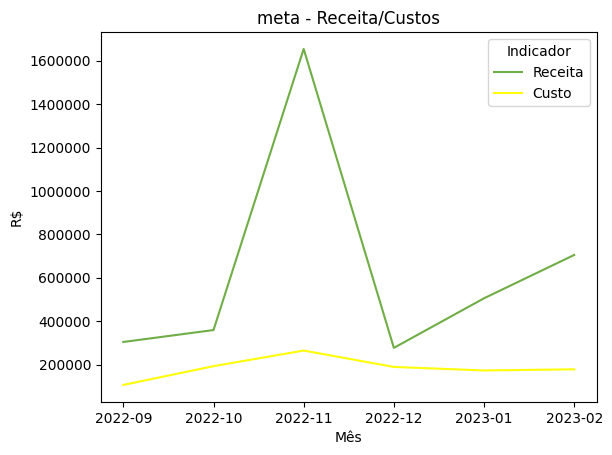

In [179]:
sns.lineplot(data=receita_plot, x=receita_plot['Mês'].astype(str), y='R$', hue='Indicador', palette=colors);
plt.title("meta - Receita/Custos");
plt.ticklabel_format(style='plain', axis='y')
plt.show();

#### Análise bivariada




In [180]:
campanha_impressoes = meta['Impressões do anúncio'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_impressoes.columns = ['Tipo de Campanha','Impressões do anúncio']
campanha_impressoes_perc = (meta['Impressões do anúncio'].groupby(meta['Tipo de Campanha']).sum()/meta['Impressões do anúncio'].sum()*100).reset_index().round(2)
campanha_impressoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_impressao = pd.merge(campanha_impressoes, campanha_impressoes_perc, on = 'Tipo de Campanha')
freq_campanha_impressao

,Tipo de Campanha,Impressões do anúncio,%
0,Conversão,44303090,87.06
1,Remarketing,6587460,12.94


87% das campanhas são de conversão

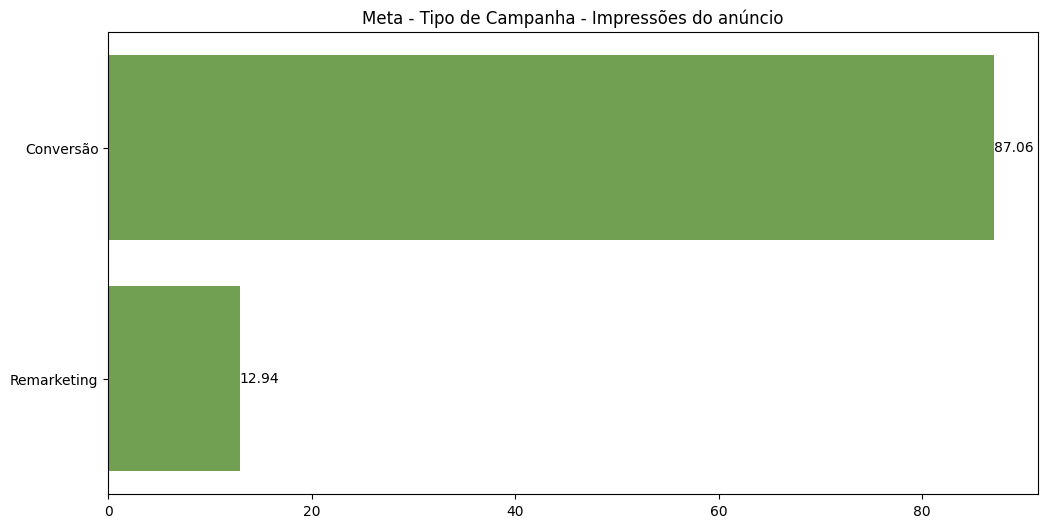

In [181]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_impressao, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [182]:
campanha_cliques = meta['Cliques'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_cliques.columns = ['Tipo de Campanha','Cliques']
campanha_cliques_perc = (meta['Cliques'].groupby(meta['Tipo de Campanha']).sum()/meta['Cliques'].sum()*100).reset_index().round(2)
campanha_cliques_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cliques = pd.merge(campanha_cliques, campanha_cliques_perc, on = 'Tipo de Campanha')
freq_campanha_cliques

,Tipo de Campanha,Cliques,%
0,Conversão,273863,88.7
1,Remarketing,34875,11.3


Quase 89% dos cliques são para campanhas de conversão.

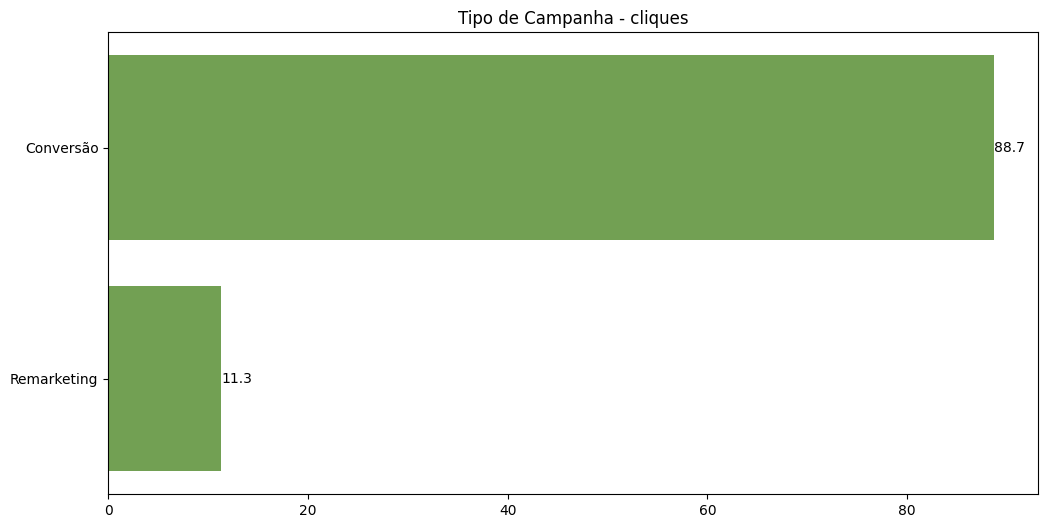

In [183]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cliques, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Tipo de Campanha - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [184]:
campanha_custo = meta['Custo'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_custo.columns = ['Tipo de Campanha','Custo']
campanha_custo_perc = (meta['Custo'].groupby(meta['Tipo de Campanha']).sum()/meta['Custo'].sum()*100).reset_index().round(2)
campanha_custo_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_custo = pd.merge(campanha_custo, campanha_custo_perc, on = 'Tipo de Campanha')
freq_campanha_custo

,Tipo de Campanha,Custo,%
0,Conversão,849518.6,77.01
1,Remarketing,253611.6,22.99


77% dos custos são das campanhas de conversão.

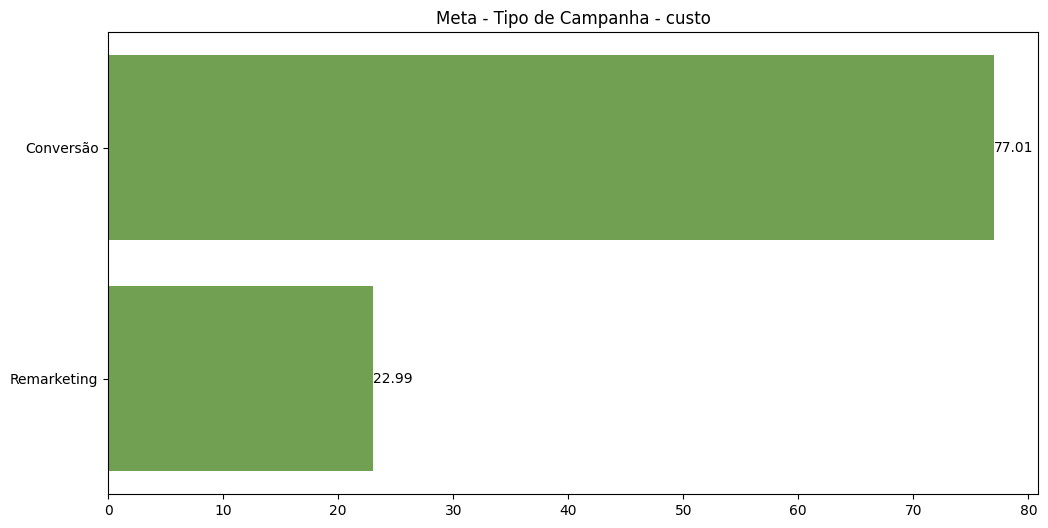

In [185]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_custo, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [186]:
campanha_cc = meta['Cadastros de Conta Corrente'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_cc.columns = ['Tipo de Campanha','Cadastros de Conta Corrente']
campanha_cc_perc = (meta['Cadastros de Conta Corrente'].groupby(meta['Tipo de Campanha']).sum()/meta['Cadastros de Conta Corrente'].sum()*100).reset_index().round(2)
campanha_cc_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cc = pd.merge(campanha_cc, campanha_cc_perc, on = 'Tipo de Campanha')
freq_campanha_cc

,Tipo de Campanha,Cadastros de Conta Corrente,%
0,Conversão,4424,100.0
1,Remarketing,0,0.0


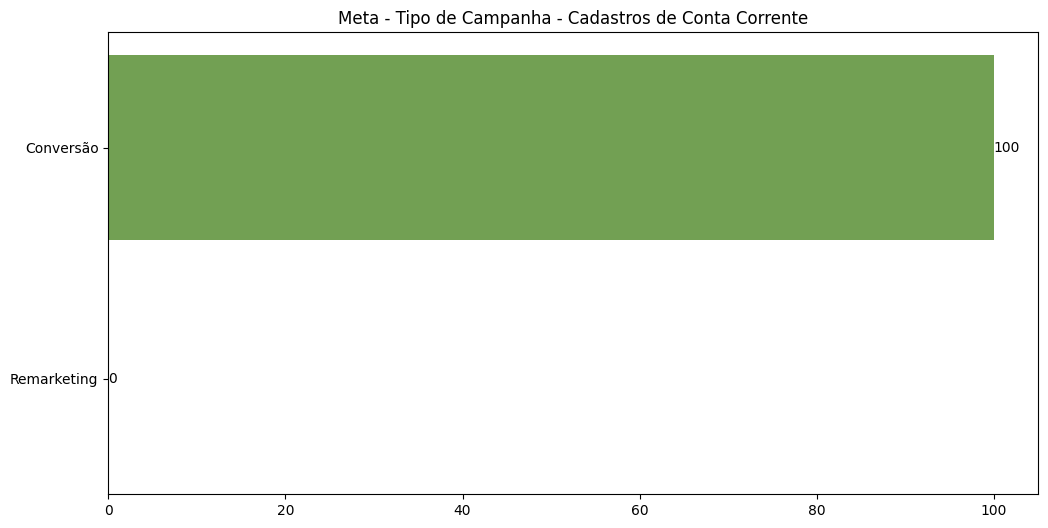

In [187]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cc, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Cadastros de Conta Corrente')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [188]:
campanha_conversoes = meta['Conversões'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_conversoes.columns = ['Tipo de Campanha','Conversões']
campanha_conversoes_perc = (meta['Conversões'].groupby(meta['Tipo de Campanha']).sum()/meta['Conversões'].sum()*100).reset_index().round(2)
campanha_conversoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_conversoes = pd.merge(campanha_conversoes, campanha_conversoes_perc, on = 'Tipo de Campanha')
freq_campanha_conversoes

,Tipo de Campanha,Conversões,%
0,Conversão,131,62.98
1,Remarketing,77,37.02


Quase 63% das contratações são oriundas das campanhas de conversão.

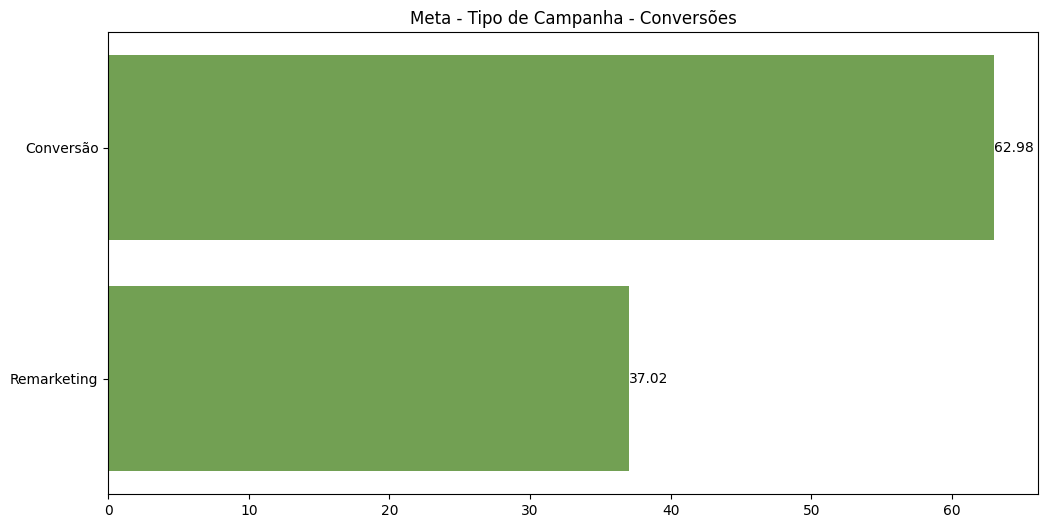

In [189]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_conversoes, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [190]:
campanha_receita = meta['Receita'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_receita.columns = ['Tipo de Campanha','Receita']
campanha_receita_perc = (meta['Receita'].groupby(meta['Tipo de Campanha']).sum()/meta['Receita'].sum()*100).reset_index().round(2)
campanha_receita_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_receita = pd.merge(campanha_receita, campanha_receita_perc, on = 'Tipo de Campanha')
freq_campanha_receita

,Tipo de Campanha,Receita,%
0,Conversão,2476550.70,65.09
1,Remarketing,1328259.45,34.91


65% das receitas são oriundas das campanhas de conversão.

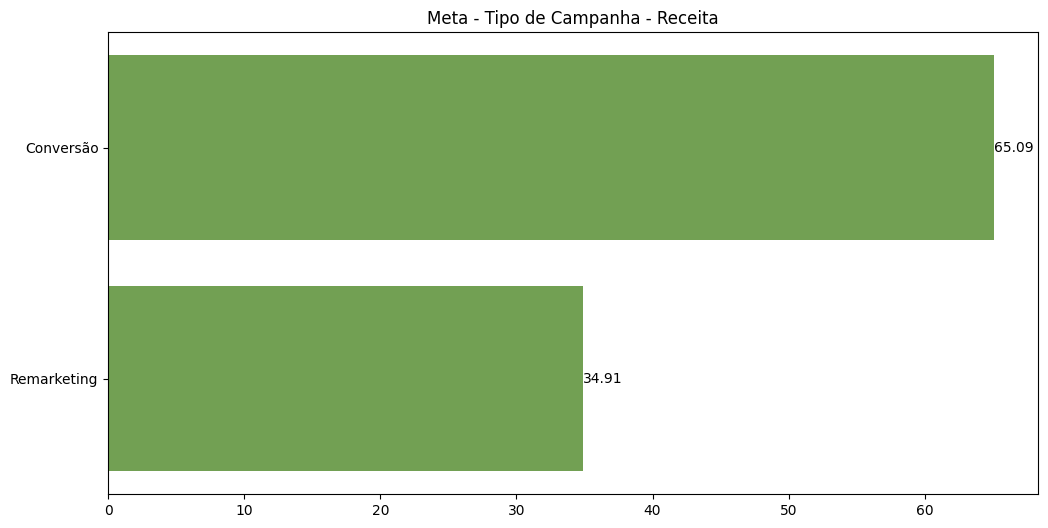

In [191]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_receita, x= "%", y= 'Tipo de Campanha', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [192]:
produto_impressoes = meta['Impressões do anúncio'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_impressoes.columns = ['Produto/Anúncio','Impressões do anúncio']
produto_impressoes_perc = (meta['Impressões do anúncio'].groupby(meta['Produto/Anúncio']).sum()/meta['Impressões do anúncio'].sum()*100).reset_index().round(2)
produto_impressoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_impressao = pd.merge(produto_impressoes, produto_impressoes_perc, on = 'Produto/Anúncio')
freq_produto_impressao

,Produto/Anúncio,Impressões do anúncio,%
0,Conta Corrente Digital,13909810,27.33
1,Empréstimo,36980740,72.67


72,67% das impressões são para campanhas do produto empréstimo.

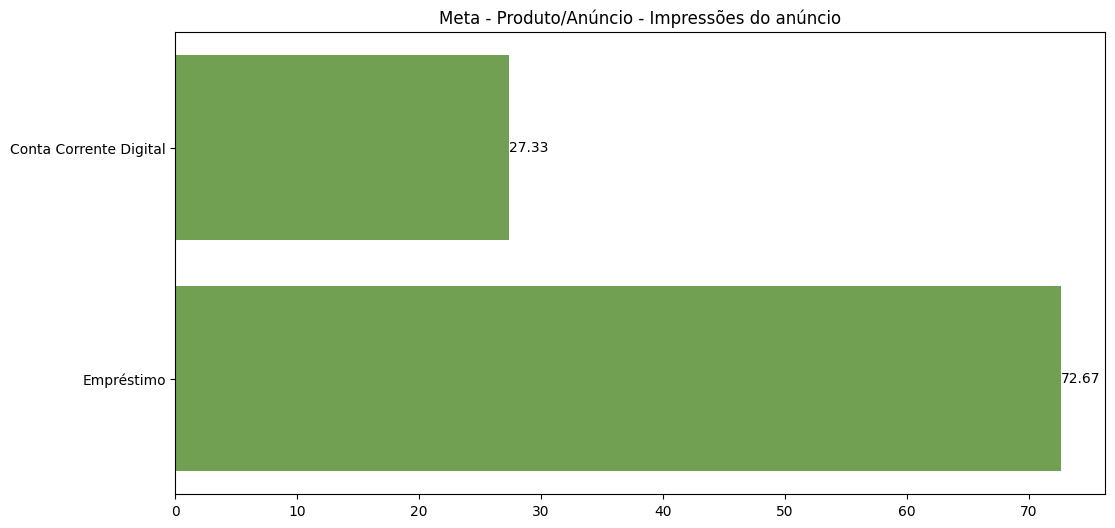

In [193]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_impressao, x= "%", y= 'Produto/Anúncio', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [194]:
produto_cliques = meta['Cliques'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_cliques.columns = ['Produto/Anúncio','Cliques']
produto_cliques_perc = (meta['Cliques'].groupby(meta['Produto/Anúncio']).sum()/meta['Cliques'].sum()*100).reset_index().round(2)
produto_cliques_perc.columns = ['Produto/Anúncio', '%']
freq_produto_cliques = pd.merge(produto_cliques, produto_cliques_perc, on = 'Produto/Anúncio')
freq_produto_cliques

,Produto/Anúncio,Cliques,%
0,Conta Corrente Digital,131520,42.6
1,Empréstimo,177218,57.4


Apesar do grande volume de impressões para o produto empréstimo, esse produto tem ainda a maioria dos cliques, mas em menor percentual (57,4%).

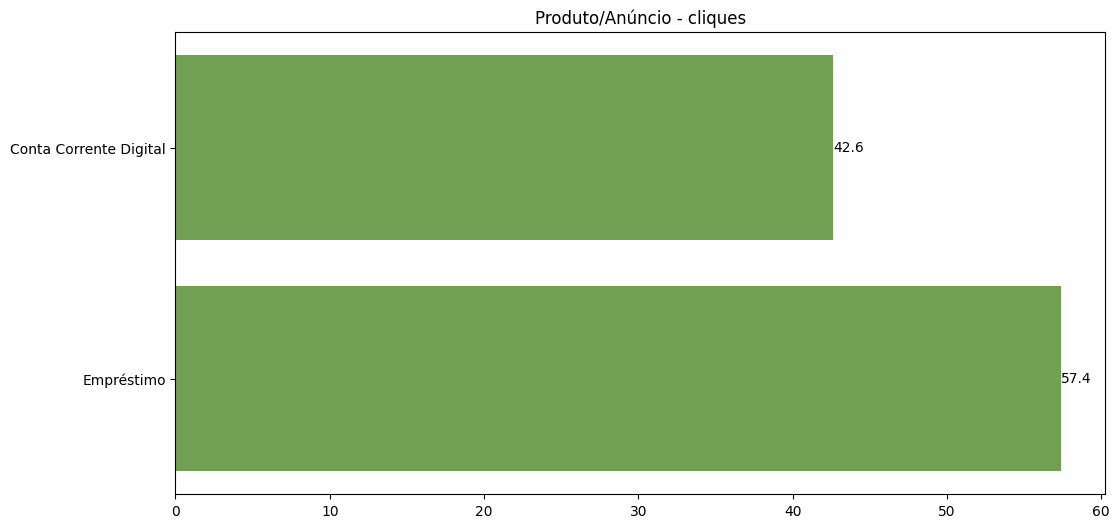

In [195]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_cliques, x= "%", y= 'Produto/Anúncio', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Produto/Anúncio - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [196]:
produto_custo = meta['Custo'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_custo.columns = ['Produto/Anúncio','Custo']
produto_custo_perc = (meta['Custo'].groupby(meta['Produto/Anúncio']).sum()/meta['Custo'].sum()*100).reset_index().round(2)
produto_custo_perc.columns = ['Produto/Anúncio', '%']
freq_produto_custo = pd.merge(produto_custo, produto_custo_perc, on = 'Produto/Anúncio')
freq_produto_custo

,Produto/Anúncio,Custo,%
0,Conta Corrente Digital,135691.1,12.3
1,Empréstimo,967439.1,87.7


Quase 88% dos custos são para o produto empréstimo.

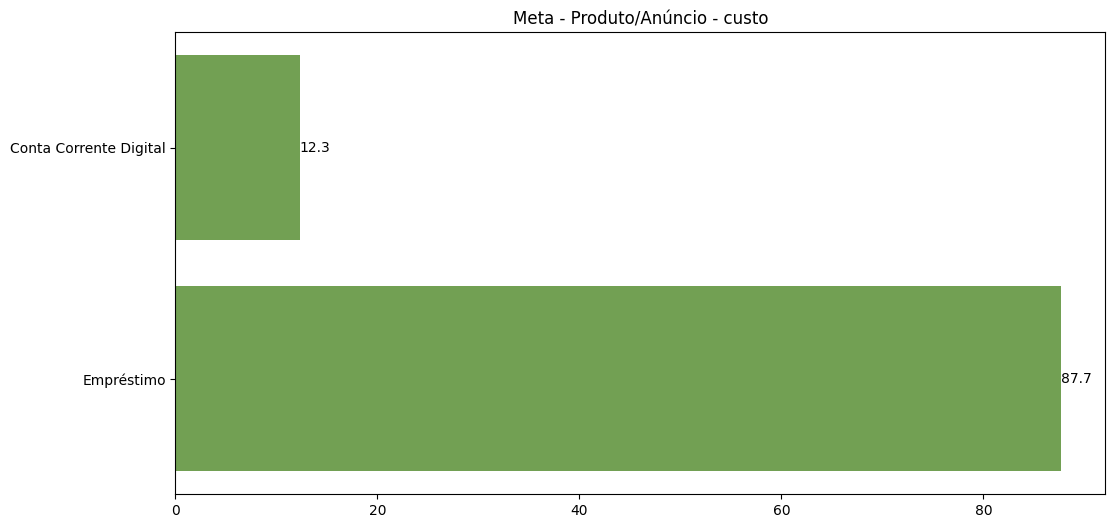

In [197]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_custo, x= "%", y= 'Produto/Anúncio', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [198]:
produto_conversoes = meta['Conversões'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_conversoes.columns = ['Produto/Anúncio','Conversões']
produto_conversoes_perc = (meta['Conversões'].groupby(meta['Produto/Anúncio']).sum()/meta['Conversões'].sum()*100).reset_index().round(2)
produto_conversoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_conversoes = pd.merge(produto_conversoes, produto_conversoes_perc, on = 'Produto/Anúncio')
freq_produto_conversoes

,Produto/Anúncio,Conversões,%
0,Conta Corrente Digital,0,0.0
1,Empréstimo,208,100.0


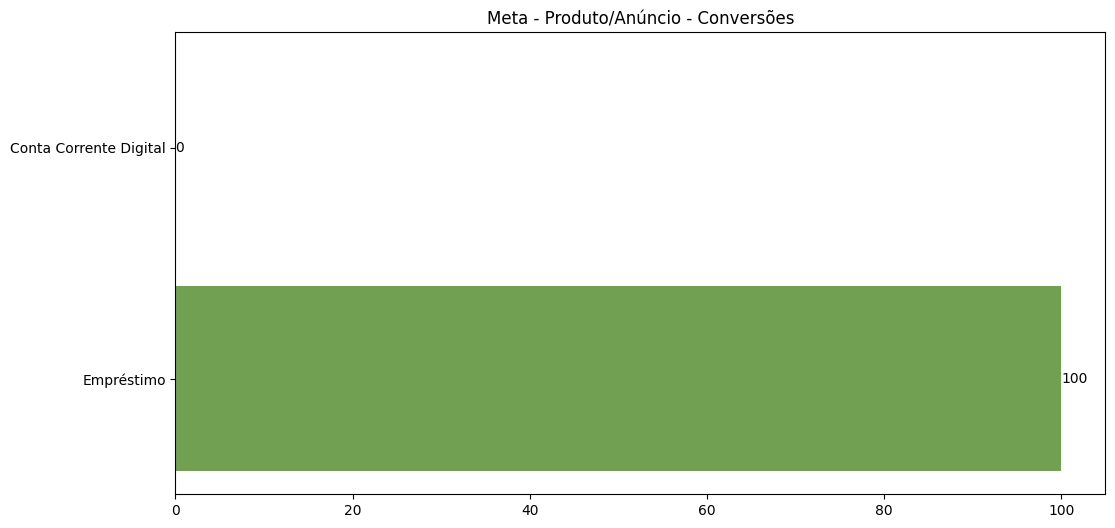

In [199]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_conversoes, x= "%", y= 'Produto/Anúncio', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [200]:
produto_receita = meta['Receita'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_receita.columns = ['Produto/Anúncio','Receita']
produto_receita_perc = (meta['Receita'].groupby(meta['Produto/Anúncio']).sum()/meta['Receita'].sum()*100).reset_index().round(2)
produto_receita_perc.columns = ['Produto/Anúncio', '%']
freq_produto_receita = pd.merge(produto_receita, produto_receita_perc, on = 'Produto/Anúncio')
freq_produto_receita

,Produto/Anúncio,Receita,%
0,Conta Corrente Digital,0.00,0.0
1,Empréstimo,3804810.15,100.0


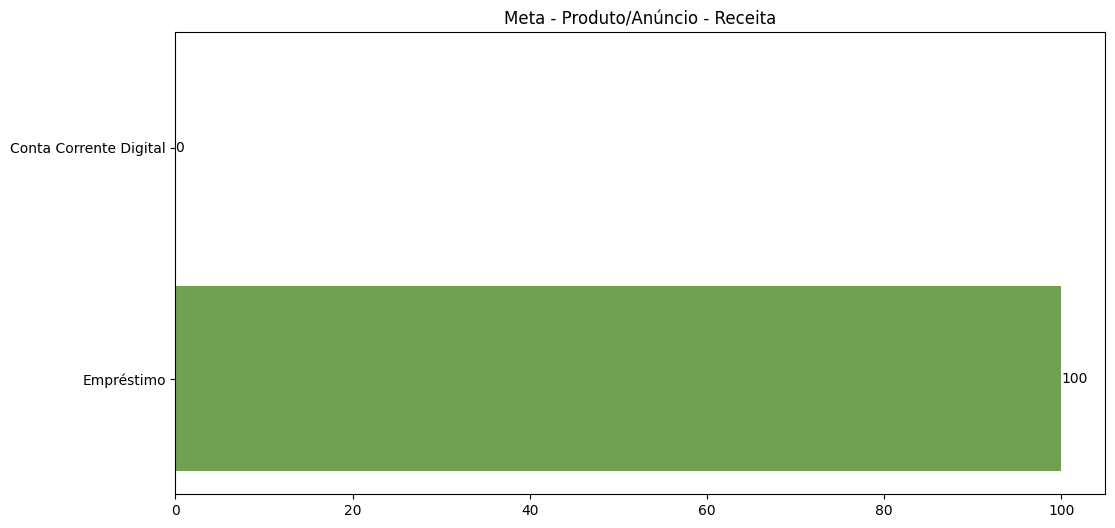

In [201]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_receita, x= "%", y= 'Produto/Anúncio', palette= [colors[0]])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [202]:
meta.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_metaads_tratada.xlsx", index = False)

####Funil - Meta

In [204]:
impressoes_meta = meta['Impressões do anúncio'].sum()
cliques_meta = meta['Cliques'].sum()
conversoes_meta = meta['Conversões'].sum()

In [205]:
funil_meta = {'Impressões do anúncio': [impressoes_meta], 'Cliques': [cliques_meta], 'Conversões': [conversoes_meta]}

In [206]:
funil_meta = pd.DataFrame(data = funil_meta).melt()

In [207]:
funil_meta.columns = ['Fase', 'Qtde']

In [208]:
funil_meta

,Fase,Qtde
0,Impressões do anúncio,50890550
1,Cliques,308738
2,Conversões,208


In [209]:
fig = px.funnel(funil_meta, x='Qtde', y='Fase', color_discrete_sequence = ["#70AD46"])
fig.update_traces(texttemplate="%{value:,d}", textfont = {'color': 'white'})
fig.update_layout(separators = ',.', paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)", font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    font=dict(size=20, color='black'),
    title={
        'text': "",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="black",
    legend_title_font_color="white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ))
fig.update_yaxes(title='')
fig.show()

In [210]:
CTR_meta = cliques_meta/impressoes_meta * 100
CTR_meta

0.6066705901193837

In [211]:
TC_meta = conversoes_meta / cliques_meta * 100
TC_meta

0.06737103952218386

In [213]:
cpc = meta['Custo'].sum()/cliques_meta
cpc

3.573030206842047

In [214]:
cc = meta['Custo'].sum()/conversoes_meta
cc

5303.510576923077

In [215]:
roas = (meta['Receita'].sum() - meta['Custo'].sum())/meta['Custo'].sum()
roas


2.4491034240563807

###Funil geral

In [216]:
acessos = google_analytics.groupby(['Mês de acesso'])['Acessos ao Site'].sum().reset_index()
acessos.columns = ['Mês', 'Acessos ao site']


In [219]:
impressoes = google['Impressões do anúncio'].sum() + meta['Impressões do anúncio'].sum()
cliques = google['Cliques'].sum() + meta['Cliques'].sum()
conversoes = google['Conversões'].sum() + meta['Conversões'].sum()

In [220]:
funil = {'Impressões do anúncio': [impressoes], 'Cliques': [cliques], 'Conversões': [conversoes]}

In [221]:
funil = pd.DataFrame(data = funil).melt()

In [222]:
funil.columns = ['Fase', 'Qtde']

In [223]:
ctr = cliques / impressoes * 100
ctr.round(2)

0.84

In [224]:
funil

,Fase,Qtde
0,Impressões do anúncio,62348630
1,Cliques,522108
2,Conversões,346


In [225]:
fig = px.funnel(funil, x='Qtde', y='Fase', color_discrete_sequence = ["#70AD46"])
fig.update_traces(texttemplate="%{value:,d}", textfont = {'color': 'white'})
fig.update_layout(separators = ',.', paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)", font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    font=dict(size=20, color='black'),
    title={
        'text': "Funil geral - Google Ads e Meta Ads",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="black",
    legend_title_font_color="white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ))
fig.update_yaxes(title='')
fig.show()

## Base de correntistas (junção de cadastro + CRM) e perguntas de negócios

In [226]:
correntista = cadastro.merge(crm, how='left', right_on='ID_Lead', left_on='ID_Lead')

Quantidade de novos clientes

Efeito de custo

In [227]:
total_novos_clientes_custo = meta['Cadastros de Conta Corrente'].sum()
total_novos_clientes_custo

4424

In [228]:
novos_clientes_custo = meta.groupby('Mês')['Cadastros de Conta Corrente'].sum().reset_index()
novos_clientes_custo.columns = ["mês da abertura", "clientes novos"]
novos_clientes_custo['clientes acumulado'] = novos_clientes_custo['clientes novos'].cumsum()
novos_clientes_custo['custo mensal da conta'] = novos_clientes_custo['clientes acumulado'] * 100
novos_clientes_custo

,mês da abertura,clientes novos,clientes acumulado,custo mensal da conta
0,2022-09,0,0,0
1,2022-10,1071,1071,107100
2,2022-11,1468,2539,253900
3,2022-12,895,3434,343400
4,2023-01,470,3904,390400
5,2023-02,520,4424,442400


Para efeito de cadastro

In [229]:
novos_clientes_cadastro = cadastro['mês da abertura'].value_counts().reset_index()
novos_clientes_cadastro.columns = ["mês da abertura", "clientes novos"]
novos_clientes_cadastro.sort_values(by='mês da abertura')

,mês da abertura,clientes novos
5,2022-09,35
4,2022-10,60
3,2022-11,71
2,2022-12,98
0,2023-01,129
1,2023-02,119


In [230]:
novos_clientes_cadastro['clientes novos'].sum()

512

In [231]:
novos_clientes_conversao = correntista[correntista['Conversões']=='Sim']['mês da abertura'].value_counts(dropna=False).reset_index()
novos_clientes_conversao.columns = ["mês da abertura", "conversão clientes novos"]
novos_clientes_conversao.sort_values(by='mês da abertura')

,mês da abertura,conversão clientes novos
2,2022-09,12
1,2022-10,13
0,2022-11,14
3,2022-12,10
4,2023-01,7
5,2023-02,7


In [232]:
conta_conversao = novos_clientes_cadastro.merge(novos_clientes_conversao, how="left")
conta_conversao['% conversão'] = ((conta_conversao['conversão clientes novos']/conta_conversao['clientes novos'])*100).round(2)
conta_conversao.sort_values(by='mês da abertura')

,mês da abertura,clientes novos,conversão clientes novos,% conversão
5,2022-09,35,12,34.29
4,2022-10,60,13,21.67
3,2022-11,71,14,19.72
2,2022-12,98,10,10.20
0,2023-01,129,7,5.43
1,2023-02,119,7,5.88


In [233]:
conta_conversao = conta_conversao.melt(id_vars='mês da abertura', 
        var_name="Indicador", 
        value_name="%")
conta_conversao.sort_values(by='mês da abertura')

,mês da abertura,Indicador,%
17,2022-09,% conversão,34.29
5,2022-09,clientes novos,35.00
11,2022-09,conversão clientes novos,12.00
4,2022-10,clientes novos,60.00
10,2022-10,conversão clientes novos,13.00
16,2022-10,% conversão,21.67
15,2022-11,% conversão,19.72
3,2022-11,clientes novos,71.00
9,2022-11,conversão clientes novos,14.00
14,2022-12,% conversão,10.20


<ipython-input-234-87048684b09f>:2: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



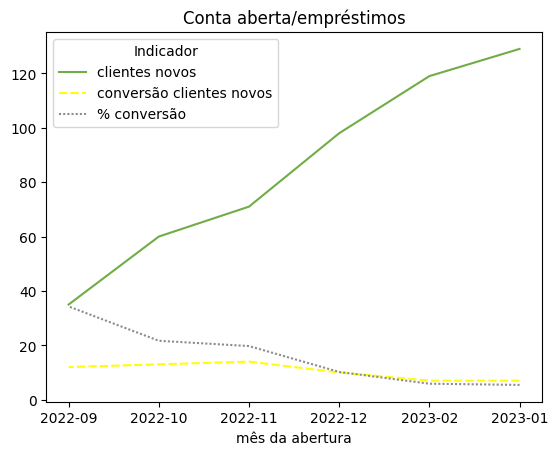

In [234]:
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205", "#FFA500"]
fig = sns.lineplot(data=conta_conversao, x=conta_conversao["mês da abertura"].astype(str), y="%", hue="Indicador", style="Indicador", palette=colors).invert_xaxis()
plt.ticklabel_format(style='plain', axis='y');
plt.ylabel('')
plt.title("Conta aberta/empréstimos");
plt.show();

## Fluxo de venda correntista

In [235]:
correntista['Qtde dias simulação'] = (correntista['Data do Lead'] - correntista['data do cadastro da conta digital']).dt.days

In [236]:
correntista['Qtde dias simulação'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Qtde dias simulação,461.0,3.793926,32.698206,-166.0,0.0,0.0,15.0,137.0


In [237]:
correntista.loc[correntista['Qtde dias simulação'] < 0, 'simulação antes da conta'] = "Simulação antes de abrir a conta"

In [238]:
correntista.loc[correntista['Qtde dias simulação'] >= 0, 'simulação antes da conta'] = "Simulação após abrir a conta"

In [239]:
correntista.loc[correntista['Qtde dias simulação'].isna(), 'simulação antes da conta'] = "Não realizou simulação"

In [240]:
simula_antes=(correntista['simulação antes da conta'].value_counts(dropna=False)).reset_index().round(2)
simula_antes.columns = ['simulação antes da conta', 'Qtde']
simula_antes_perc=(correntista['simulação antes da conta'].value_counts(1, dropna=False)*100).reset_index().round(2)
simula_antes_perc.columns = ['simulação antes da conta', '%']
simula_antes.merge(simula_antes_perc, how='left')

,simulação antes da conta,Qtde,%
0,Simulação após abrir a conta,357,69.73
1,Simulação antes de abrir a conta,104,20.31
2,Não realizou simulação,51,9.96


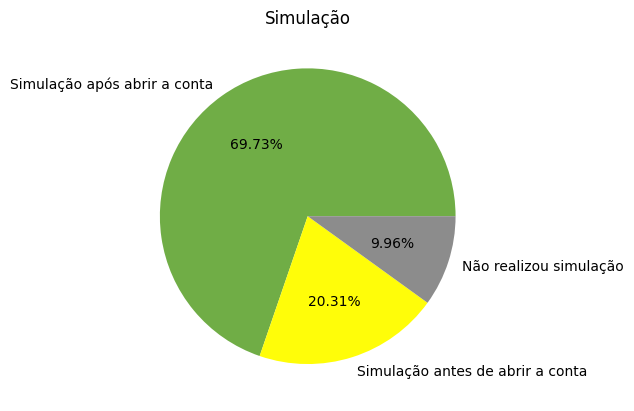

In [241]:
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205", "#FFA500"]
plt.pie(simula_antes_perc['%'], labels = simula_antes_perc['simulação antes da conta'], autopct='%.2f%%', colors=colors)
plt.title("Simulação")
plt.show()

In [242]:
correntista[correntista['simulação antes da conta']=="Simulação antes de abrir a conta"]['Qtde dias simulação'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Qtde dias simulação,104.0,-33.423077,33.352979,-166.0,-48.25,-21.0,-8.0,-1.0


In [243]:
correntista[correntista['simulação antes da conta']=="Simulação após abrir a conta"]['Qtde dias simulação'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Qtde dias simulação,357.0,14.635854,23.176452,0.0,0.0,2.0,23.0,137.0


In [244]:
correntista['Qtde dias contratação/conta'] = (correntista['Data da Conversão'] - correntista['data do cadastro da conta digital']).dt.days

In [245]:
correntista['Qtde dias contratação/conta'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Qtde dias contratação/conta,63.0,33.746032,36.635946,-15.0,10.5,22.0,48.0,160.0


In [246]:
correntista.loc[~(correntista['Qtde dias contratação/conta'].isna()), 'contratação empréstimo'] = "Contratou empréstimo"

In [247]:
correntista.loc[(correntista['Qtde dias contratação/conta'].isna()) & (correntista['Qtde dias simulação'].isna()), 'contratação empréstimo'] = "Não simulou"

In [248]:
correntista.loc[(correntista['Qtde dias contratação/conta'].isna()) & (correntista['Qtde dias simulação'].notna()), 'contratação empréstimo'] = "Simulou, mas não contratou"

In [249]:
contrata_antes=(correntista['contratação empréstimo'].value_counts(dropna=False)).reset_index()
contrata_antes.columns = ['situação do correntista - contratação', 'Qtde']
contrata_antes_perc=(correntista['contratação empréstimo'].value_counts(1, dropna=False)*100).round(2).reset_index()
contrata_antes_perc.columns = ['situação do correntista - contratação', '%']
situacao_correntista = contrata_antes.merge(contrata_antes_perc, how='left')

In [250]:
situacao_correntista

,situação do correntista - contratação,Qtde,%
0,"Simulou, mas não contratou",398,77.73
1,Contratou empréstimo,63,12.30
2,Não simulou,51,9.96


In [251]:
funil_correntistas = pd.DataFrame({'Correntistas': [situacao_correntista[situacao_correntista['situação do correntista - contratação']=='Simulou, mas não contratou']['Qtde'].item() +  situacao_correntista.loc[situacao_correntista['situação do correntista - contratação']=='Contratou empréstimo']['Qtde'].item() + situacao_correntista.loc[situacao_correntista['situação do correntista - contratação']=='Não simulou']['Qtde'].item()], 'Simulações': [situacao_correntista[situacao_correntista['situação do correntista - contratação']=='Simulou, mas não contratou']['Qtde'].item() +  situacao_correntista.loc[situacao_correntista['situação do correntista - contratação']=='Contratou empréstimo']['Qtde'].item()], "Contratações": [situacao_correntista.loc[situacao_correntista['situação do correntista - contratação']=='Contratou empréstimo']['Qtde'].item()]}).T.reset_index()
funil_correntistas.columns = ['Etapa - Correntistas', 'Qtde']

In [252]:
funil_correntistas['%'] = (funil_correntistas['Qtde'] / funil_correntistas['Qtde'][0] * 100).round(2)

In [253]:
fig = px.funnel(funil_correntistas, x='Qtde', y='Etapa - Correntistas', text = '%',color_discrete_sequence = ["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205", "#FFA500"])
fig.update_traces(texttemplate="%{value:,d}<br>" + "%{text}%", textfont = {'color': 'white'},
                  hovertemplate=
        "Etapa: %{y}<br>" +
        "Qtde: %{x}<br>" +
        "%: %{text}" +
        "<extra></extra>",

)
fig.update_layout(separators = ',.', paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)", font_family="Arial",
    font_color="black",
    title_font_family="Arial",
    font=dict(size=20, color='black'),
    title={
        'text': "Funil - correntistas",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="black",
    legend_title_font_color="white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Arial"
    ))
fig.update_yaxes(title='')
fig.update_xaxes(color='white')
fig.show()

Apesar de muitos clientes se interessarem pelo empréstimo (cerca de 90%), apenas 12,3% convertem.

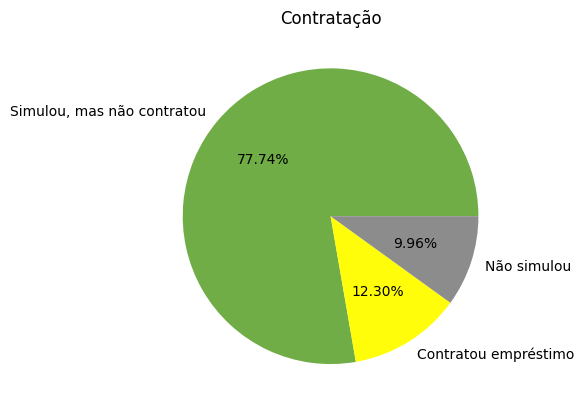

In [254]:
plt.pie(contrata_antes_perc['%'], labels = contrata_antes_perc['situação do correntista - contratação'], autopct='%.2f%%', colors=colors)
plt.title("Contratação")
plt.show()

In [255]:
correntista.loc[correntista['contratação empréstimo']=='Contratou empréstimo']['Qtde dias contratação/conta'].describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Qtde dias contratação/conta,63.0,33.746032,36.635946,-15.0,10.5,22.0,48.0,160.0


In [256]:
freq_abs = pd.DataFrame(correntista['Motivo da Perda'].value_counts())
freq_rel = pd.DataFrame(correntista['Motivo da Perda'].value_counts(1)*100)
freq_motivo_perda = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_motivo_perda.columns = ['Motivo da Perda', 'Qtde', '%']
freq_motivo_perda.round({'%': 2})


,Motivo da Perda,Qtde,%
0,Não retornou contato,314,78.89
1,Preço alto,38,9.55
2,Vai deixar para outro momento,21,5.28
3,Não tem interesse,15,3.77
4,Outros,9,2.26
5,Vai fechar com a concorrência,1,0.25


In [257]:
freq_motivo_perda['% acumulado'] = freq_motivo_perda['Qtde'].cumsum()/freq_motivo_perda['Qtde'].sum()*100
freq_motivo_perda = freq_motivo_perda.round({'%': 2,	'% acumulado': 2})

<ipython-input-258-c43ab32b5c7b>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-258-c43ab32b5c7b>:22: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-258-c43ab32b5c7b>:23: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-258-c43ab32b5c7b>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



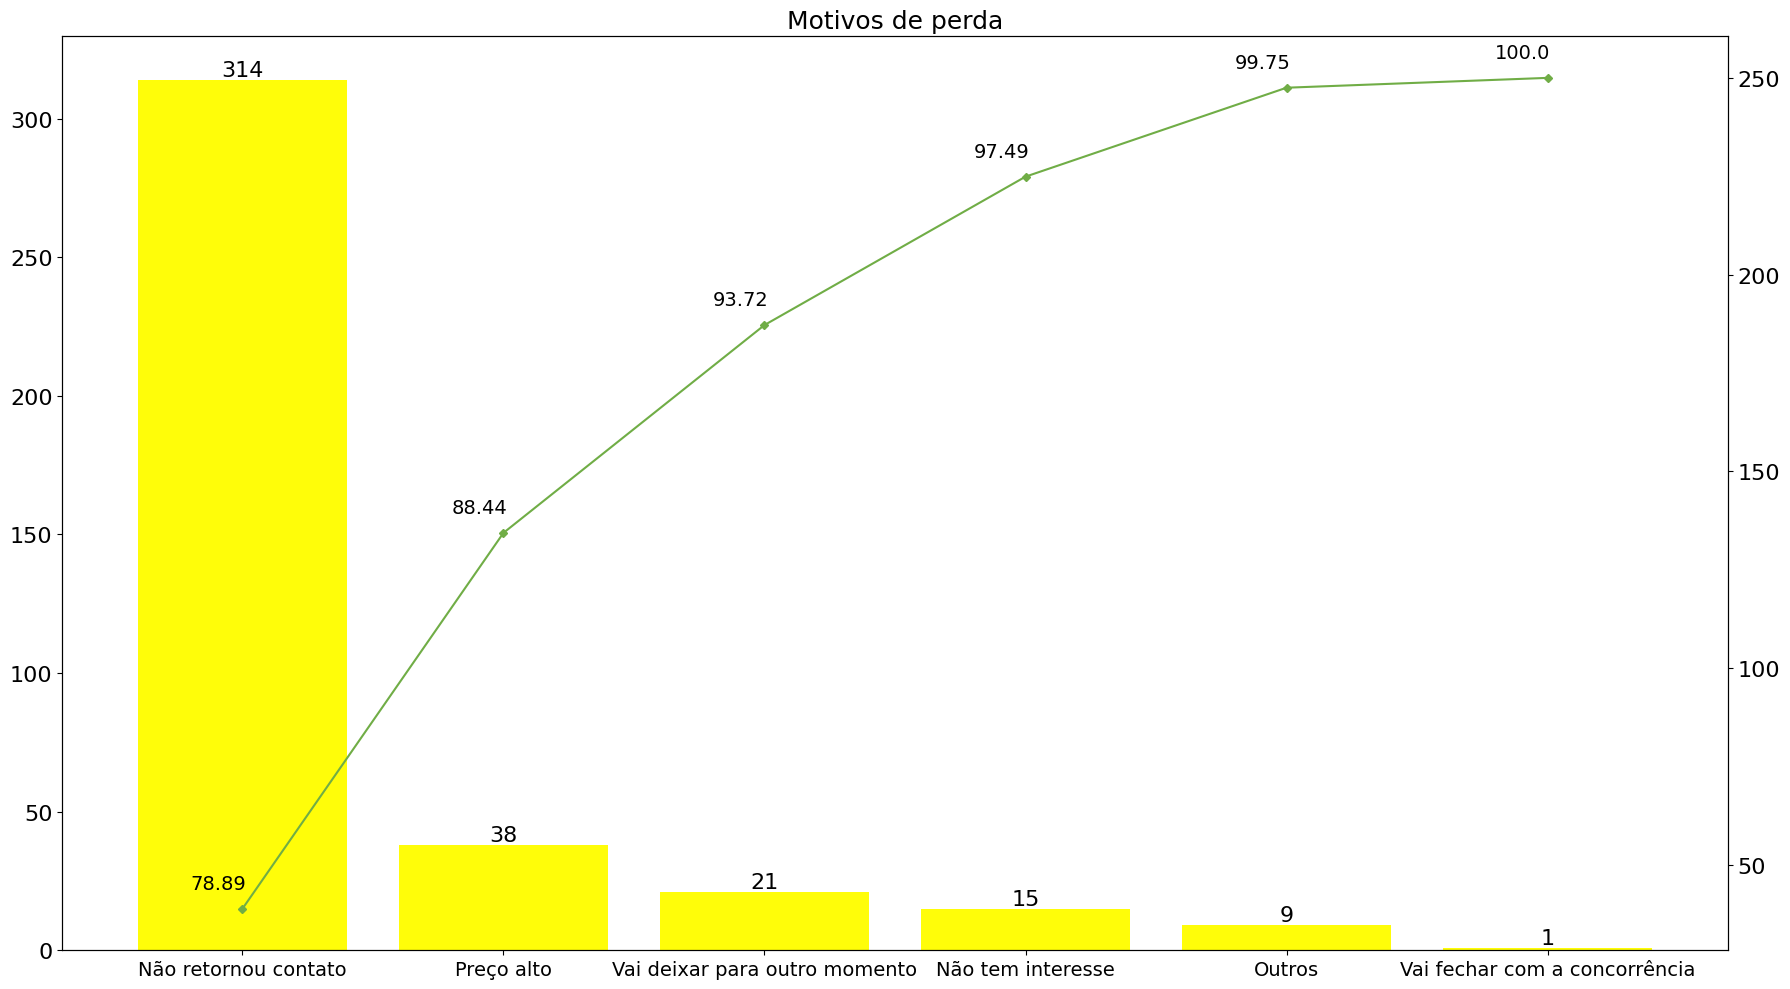

In [258]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.bar(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['Qtde'], color=colors[1])
ax.bar_label(ax.containers[0], fontsize=16)



ax2 = ax.twinx()
ax2.plot(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['% acumulado'], color=colors[0], marker="D", ms=4)
for x_val, y_val in zip (range(len(freq_motivo_perda)), freq_motivo_perda['% acumulado'].round(2)):
    ax2.text(
        x=x_val-0.2,
        y=y_val+0.5,
        s=y_val, 
        fontsize=14
    )
ax2.yaxis.set_major_formatter(PercentFormatter())


plt.title("Motivos de perda", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
ax2.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax2.set_yticklabels(ax.get_yticklabels(), fontsize=16)


plt.tight_layout()

plt.show();

In [259]:
receita_potencial = (correntista[correntista['Motivo da Perda'] == "Não retornou contato"]["Receita"].sum())
receita_potencial*0.2

1282254.0

In [260]:
conversao_mais10 = correntista[correntista['Qtde dias conversão']>10].groupby("Mês do lead")['Receita'].sum().reset_index()
conversao_mais10

,Mês do lead,Receita
0,2022-09,68824.65
1,2022-10,100024.50
2,2022-11,139434.00
3,2022-12,138424.50
4,2023-01,102420.00
5,2023-02,20205.00


In [261]:
correntista[correntista['Qtde dias conversão']>10]['Receita'].sum()

569332.65

Perfil correntista tomador

In [262]:
tomador = correntista[correntista['Conversão'] == 1]

In [263]:
freq_abs = pd.DataFrame(tomador['área de atuação'].value_counts())
freq_rel = pd.DataFrame(tomador['área de atuação'].value_counts(1)*100).round(2)
freq_area_atuacao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_area_atuacao.columns = ['área de atuação', 'Qtde', '%']
freq_area_atuacao


,área de atuação,Qtde,%
0,Economia/Administração ou Mercado Financeiro,18,28.57
1,Análise Dados / Ciência Dados / Estatística,8,12.70
2,Tecnologia,7,11.11
3,Outros,5,7.94
4,Comercial / Vendas,4,6.35
5,Marketing/Publicidade,3,4.76
6,Logística,3,4.76
7,Direito / Jurídico,3,4.76
8,Recursos Humanos,2,3.17
9,Atendimento ao cliente / CX,2,3.17


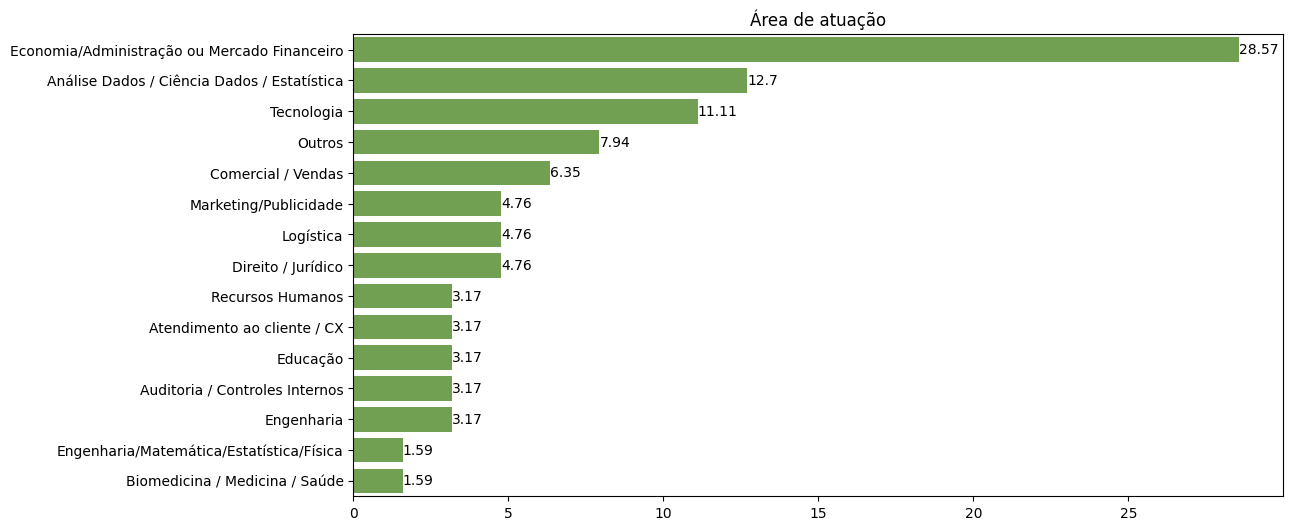

In [264]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_area_atuacao, x= "%", y= 'área de atuação', palette= [ "#70AD46"])
ax.bar_label(ax.containers[0])
plt.title("Área de atuação")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [265]:
freq_abs = pd.DataFrame(tomador['cargo atual'].value_counts())
freq_rel = pd.DataFrame(tomador['cargo atual'].value_counts(1)*100).round(2)
freq_cargo_atual = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cargo_atual.columns = ['cargo atual', 'Qtde', '%']
freq_cargo_atual


,cargo atual,Qtde,%
0,Analista,21,33.33
1,Estou desempregado(a) no momento,17,26.98
2,Outros,6,9.52
3,Estudante,6,9.52
4,Assistente,3,4.76
5,Coordenador(a) / Gerente,3,4.76
6,Especialista,3,4.76
7,Estudante ou Assistente,2,3.17
8,Consultor,1,1.59
9,Autônomo,1,1.59


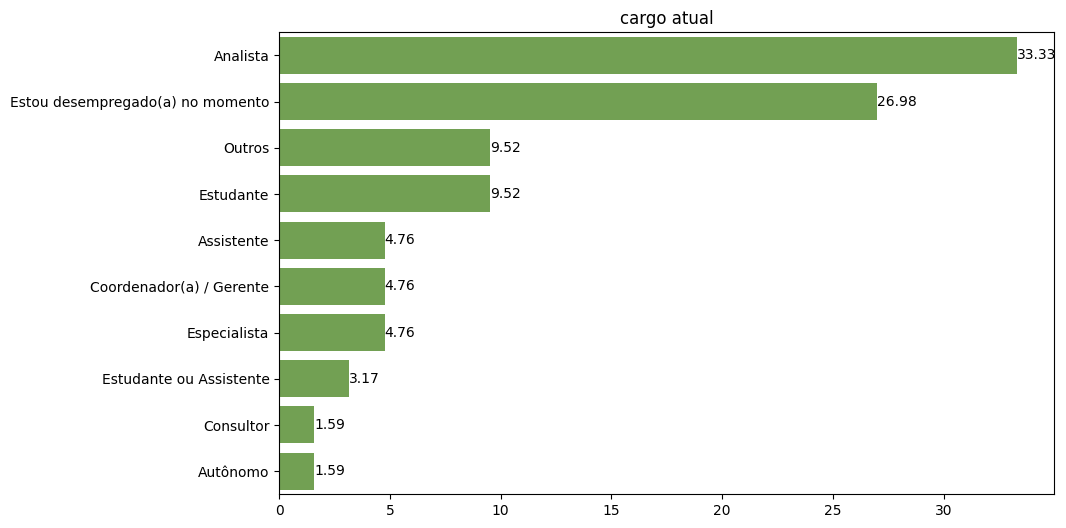

In [266]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=freq_cargo_atual, x= "%", y= 'cargo atual', palette= ["#70AD46"])
ax.bar_label(ax.containers[0])
plt.title('cargo atual')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [267]:
freq_abs = pd.DataFrame(tomador['objetivo da conta digital'].value_counts())
freq_rel = pd.DataFrame(tomador['objetivo da conta digital'].value_counts(1)*100).round(2)
freq_objetivo = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_objetivo.columns = ['objetivo da conta digital', 'Qtde', '%']
freq_objetivo


,objetivo da conta digital,Qtde,%
0,Busco um banco em que possa confiar,53,84.13
1,Apenas para testar a conta,10,15.87


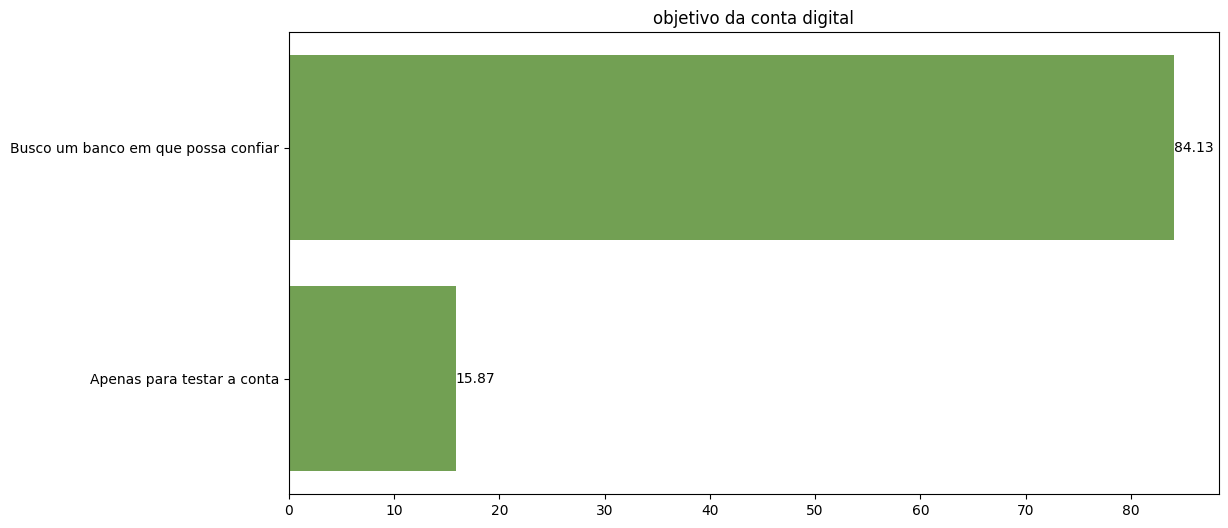

In [268]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_objetivo, x= "%", y= 'objetivo da conta digital', palette= ["#70AD46"])
ax.bar_label(ax.containers[0])
plt.title('objetivo da conta digital')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [269]:
freq_abs = pd.DataFrame(tomador['como conheceu o BR Bank'].value_counts())
freq_rel = pd.DataFrame(tomador['como conheceu o BR Bank'].value_counts(1)*100).round(2)
freq_conheceu = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conheceu.columns = ['como conheceu o BR Bank', 'Qtde', '%']
freq_conheceu


,como conheceu o BR Bank,Qtde,%
0,Instagram,34,53.97
1,Indicação,27,42.86
2,Facebook,1,1.59
3,Google,1,1.59


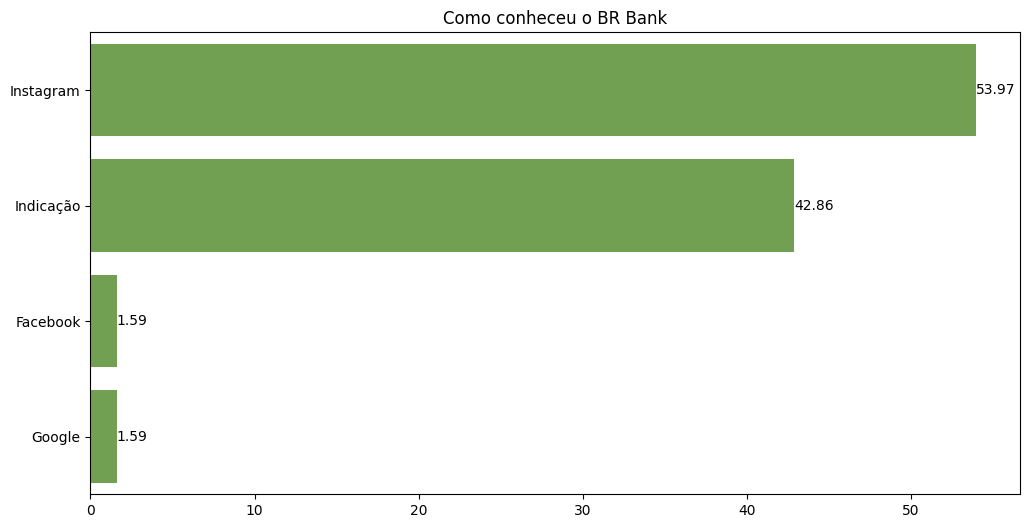

In [270]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_conheceu, x= "%", y= 'como conheceu o BR Bank', palette= ["#70AD46"])
ax.bar_label(ax.containers[0])
plt.title('Como conheceu o BR Bank')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [271]:
tomador['Estado'].value_counts(sort=False, dropna=False).reset_index()
freq_abs = pd.DataFrame(tomador['Estado'].value_counts(dropna=False))
freq_rel = pd.DataFrame(tomador['Estado'].value_counts(1, dropna=False)*100).round(2)
freq_estado = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_estado.columns = ['Estado', 'Qtde', '%']
freq_estado


,Estado,Qtde,%
0,São Paulo,25,39.68
1,Rio de Janeiro,8,12.70
2,Distrito Federal/Goiás,6,9.52
3,Rio Grande do Sul,6,9.52
4,Minas Gerais,6,9.52
5,Pernambuco,3,4.76
6,Bahia,2,3.17
7,Piauí,1,1.59
8,Amazonas,1,1.59
9,Goiás,1,1.59


In [272]:
infos_ufs = gpd.read_file("/content/drive/MyDrive/Acelera/bcim_2016_21_11_2018.gpkg", layer="lim_unidade_federacao_a")

In [273]:
infos_ufs.rename({'nome': 'Estado'}, axis=1, inplace=True)

In [274]:
brasil = infos_ufs.merge(freq_estado, on= "Estado", how="left")

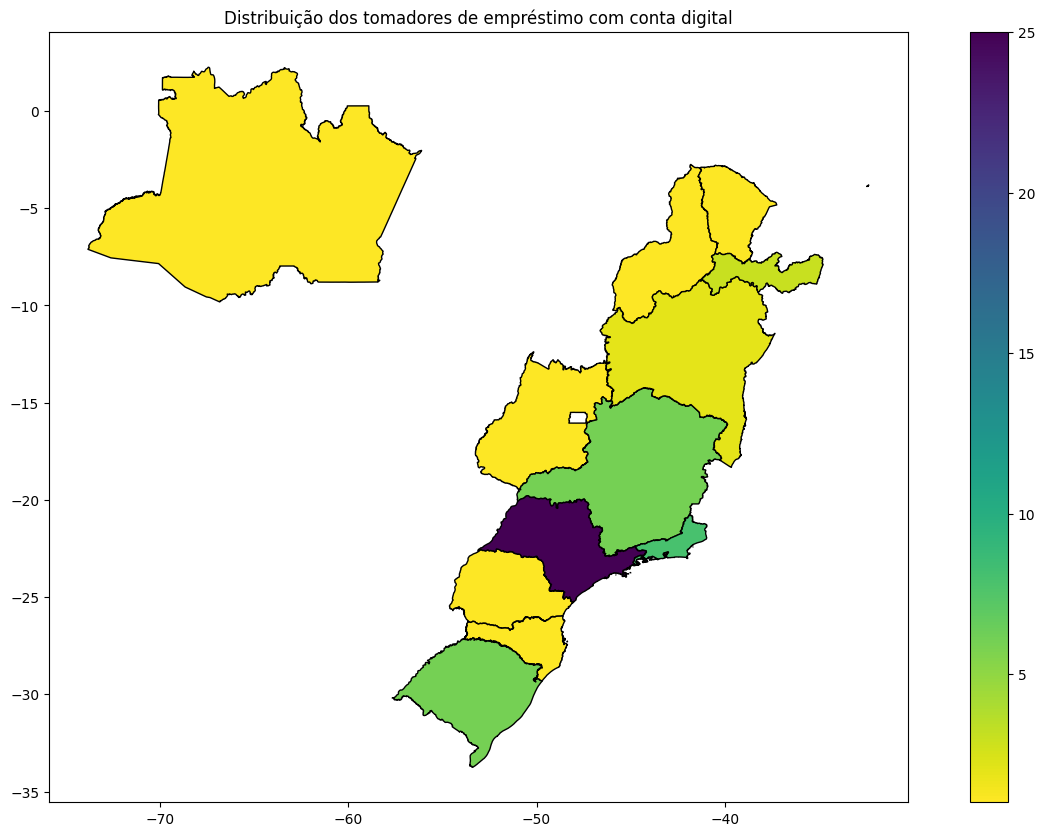

In [275]:
mapa_brasil = brasil.plot(column="Qtde", cmap="viridis_r", figsize=(16,10), legend=True, edgecolor='black')
plt.title("Distribuição dos tomadores de empréstimo com conta digital")
ax = mapa_brasil.plot()


In [276]:
crm_sem_cadastro = crm.merge(cadastro, how="left", left_on = 'ID_Lead', right_on = 'ID_Lead')

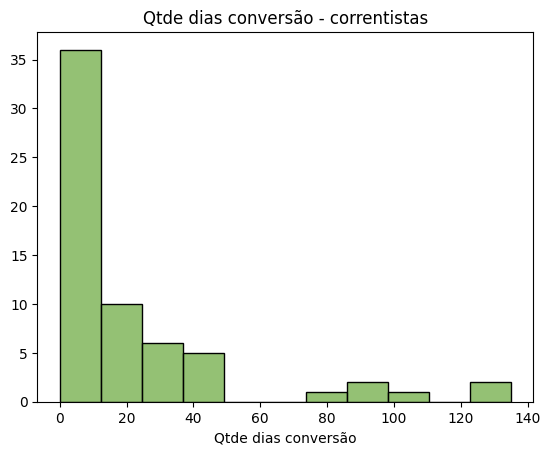

In [277]:

ax =sns.histplot(data=correntista, x="Qtde dias conversão", color="#70AD46")
plt.title("Qtde dias conversão - correntistas")
ax.set(ylabel=None)
plt.show()

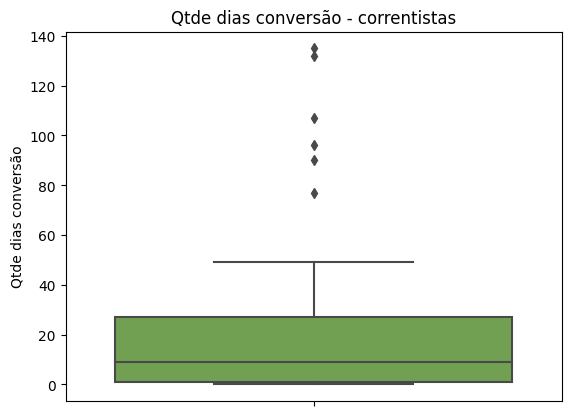

In [278]:
sns.boxplot(data=correntista, y="Qtde dias conversão", palette = colors)
plt.title("Qtde dias conversão - correntistas")
plt.show()

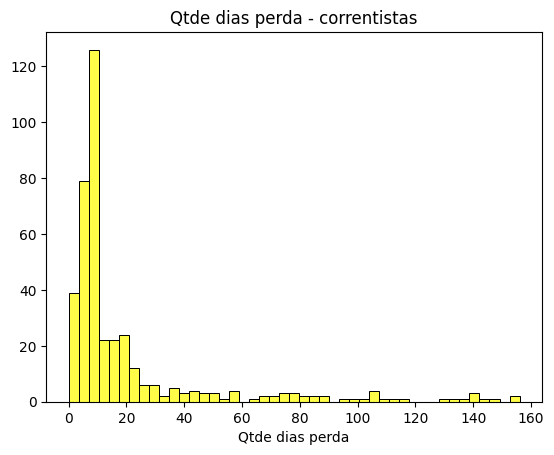

In [279]:
ax = sns.histplot(data=correntista, x="Qtde dias perda", color=colors[1])
plt.title("Qtde dias perda - correntistas")
ax.set(ylabel=None)
plt.show()

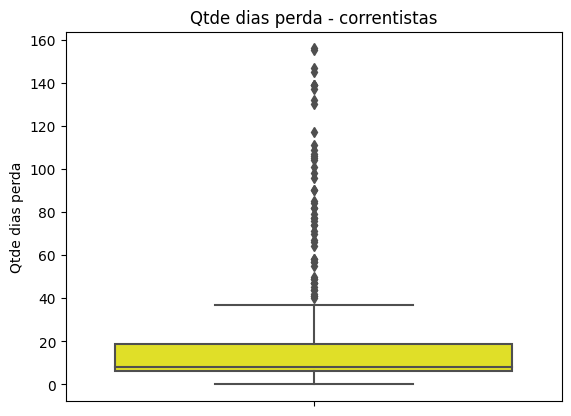

In [280]:
sns.boxplot(data=correntista, y="Qtde dias perda", palette = [colors[1]])
plt.title("Qtde dias perda - correntistas")
plt.show()

A maior parte dos leads que são correntistas são perdidos em até 40 dias.

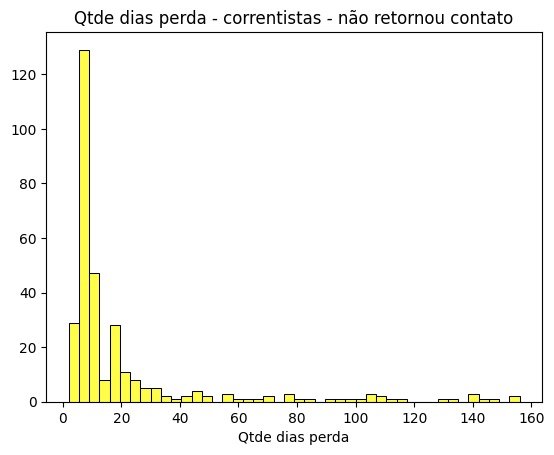

In [281]:
ax = sns.histplot(data=correntista[correntista['Motivo da Perda'] == 'Não retornou contato'], x="Qtde dias perda", color=colors[1])
plt.title("Qtde dias perda - correntistas - não retornou contato")
ax.set(ylabel=None)
plt.show()

In [282]:
correntista[['Qtde dias conversão', 'Qtde dias perda']].describe().T.reset_index().round(2)

,index,count,mean,std,min,25%,50%,75%,max
0,Qtde dias conversão,63.0,21.29,31.32,0.0,1.0,9.0,27.00,135.0
1,Qtde dias perda,398.0,20.11,29.60,0.0,6.0,8.0,18.75,156.0


In [283]:
correntista[correntista['Motivo da Perda'] == 'Não retornou contato'].describe().T.reset_index().round(2)

,index,count,mean,std,min,25%,50%,75%,max
0,Receita,314.0,20418.06,1182.11,13455.0,20205.0,20205.0,20205.00,34455.0
1,Qtde dias conversão,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Qtde dias perda,314.0,21.11,30.26,2.0,7.0,8.0,19.00,156.0
3,Qtde dias simulação,314.0,2.17,34.41,-166.0,0.0,0.0,8.75,137.0
4,Qtde dias contratação/conta,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
crm_sem_cadastro = crm_sem_cadastro[crm_sem_cadastro['área de atuação'].isna()]

In [285]:
crm_sem_cadastro['ID_Lead'] = crm_sem_cadastro['ID_Lead'].astype('object')
crm_sem_cadastro['Conversão'] = crm_sem_cadastro['Conversão'].astype('object')
crm_sem_cadastro['ID_lead'] = crm_sem_cadastro['ID_Lead'].astype('object')

<ipython-input-285-73bb3e6c433e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-285-73bb3e6c433e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-285-73bb3e6c433e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



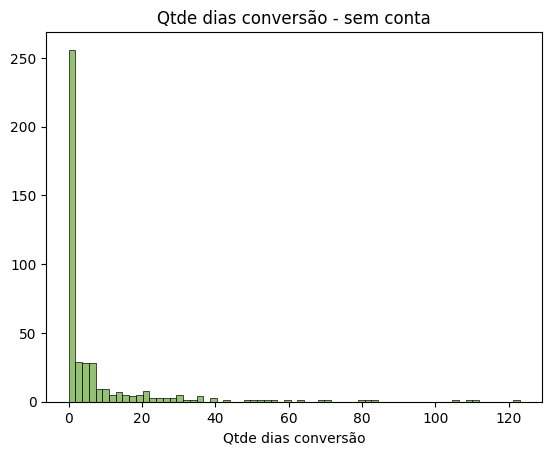

In [286]:

ax =sns.histplot(data=crm_sem_cadastro, x="Qtde dias conversão", color="#70AD46")
plt.title("Qtde dias conversão - sem conta")
ax.set(ylabel=None)
plt.show()

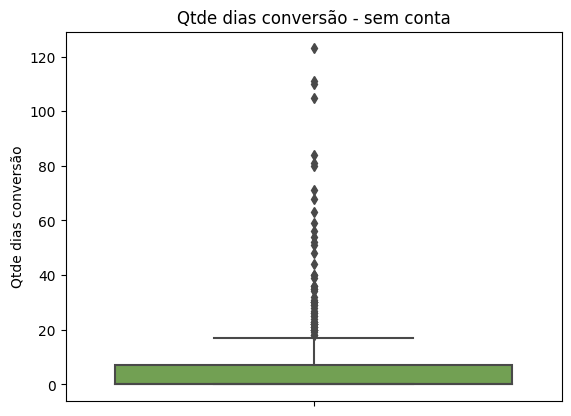

In [287]:
sns.boxplot(data=crm_sem_cadastro, y="Qtde dias conversão", palette = [colors[0]])
plt.title("Qtde dias conversão - sem conta")
plt.show()

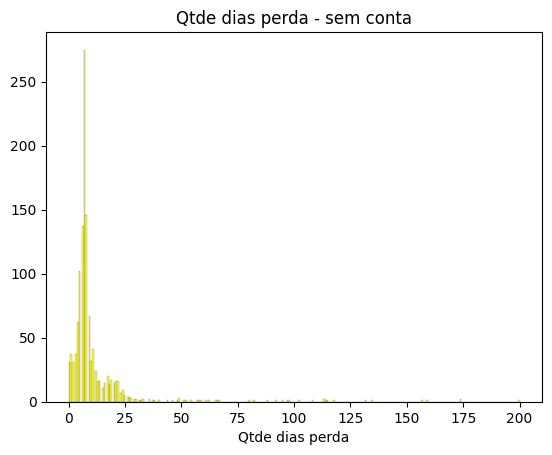

In [288]:
ax = sns.histplot(data=crm_sem_cadastro, x="Qtde dias perda", color=colors[1])
plt.title("Qtde dias perda - sem conta")
ax.set(ylabel=None)
plt.show()

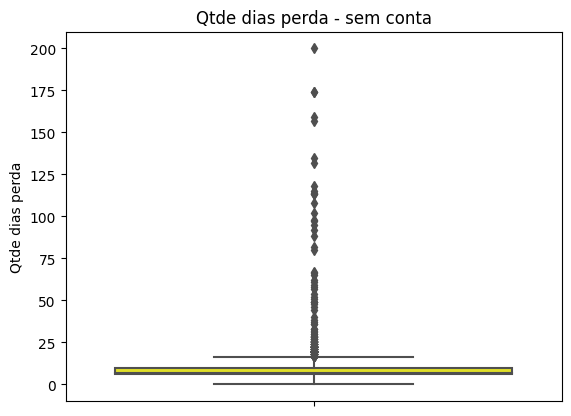

In [289]:
sns.boxplot(data=crm_sem_cadastro, y="Qtde dias perda", palette = [colors[1]])
plt.title("Qtde dias perda - sem conta")
plt.show()

In [290]:
crm_sem_cadastro.describe().T.reset_index().round(2)

,index,count,mean,std,min,25%,50%,75%,max
0,Receita,1697.0,20134.72,1986.19,2245.5,20205.0,20205.0,20205.0,34455.0
1,Qtde dias conversão,436.0,7.31,16.48,0.0,0.0,0.0,7.0,123.0
2,Qtde dias perda,1261.0,11.10,16.93,0.0,6.0,7.0,10.0,200.0


## Receitas

In [291]:
receita_total = crm[crm['Conversões']=='Sim']['Receita'].sum().round(2)
receita_total

9735383.85

In [292]:
receita_cliente = correntista[correntista['Conversões']=='Sim']['Receita'].sum()
receita_cliente

1252726.05

In [293]:
((receita_cliente/receita_total)*100).round(2)

12.87

In [294]:
receita = pd.DataFrame(crm[(crm['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita = pd.DataFrame(crm[(crm['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita

,Mês do lead,Receita
0,2022-09,1023481.35
1,2022-10,1271012.25
2,2022-11,3017722.05
3,2022-12,1159978.20
4,2023-01,1701675.00
5,2023-02,1561515.00


In [295]:
receita_novos = pd.DataFrame(correntista[(correntista['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita_novos = pd.DataFrame(correntista[(correntista['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita_novos

,Mês do lead,Receita
0,2022-09,82284.15
1,2022-10,238168.65
2,2022-11,339464.25
3,2022-12,176824.50
4,2023-01,313714.50
5,2023-02,102270.00


### Valor realizado em 2023

In [296]:
receita = pd.DataFrame(crm[(crm['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita_novos = pd.DataFrame(correntista[(correntista['Conversões']=='Sim')].groupby('Mês do lead')['Receita'].sum().reset_index())
receita_novos.columns = ['Mês do lead', 'Receita correntistas']
participacao_receita = receita.merge(receita_novos, how='left')
participacao_receita["%"] = (participacao_receita['Receita correntistas']/participacao_receita['Receita']*100).round(2)
participacao_receita

,Mês do lead,Receita,Receita correntistas,%
0,2022-09,1023481.35,82284.15,8.04
1,2022-10,1271012.25,238168.65,18.74
2,2022-11,3017722.05,339464.25,11.25
3,2022-12,1159978.20,176824.50,15.24
4,2023-01,1701675.00,313714.50,18.44
5,2023-02,1561515.00,102270.00,6.55


In [297]:
total_2023 = crm[(crm['Conversões']=='Sim') & (crm['Data do Lead'].dt.year ==2023)]['Receita'].sum()

In [298]:
total_correntista_2023 = correntista[(correntista['Conversões']=='Sim') & (correntista['Data do Lead'].dt.year ==2023)]['Receita'].sum()

In [299]:
total_correntista_2023/total_2023

0.12747786675002068

In [300]:
realizado2023 = pd.DataFrame(crm[(crm['Conversões']=='Sim') & (crm['Data do Lead'].dt.year ==2023)].groupby('Mês do lead')['Receita'].sum().reset_index())
realizado2023

,Mês do lead,Receita
0,2023-01,1701675.0
1,2023-02,1561515.0


In [301]:
realizado = crm[(crm['Conversões']=='Sim') & (crm['Data do Lead'].dt.year ==2023)]['Receita'].sum()

In [302]:
30000000 - realizado

26736810.0